# Evaluating Whether There is Support to Claim that Climate Change Impacts Food Company Stock 
**BUAN 6590: Capstone Project Final Report <br/>
Dolan School of Business <br/>
Fairfield University <br/>
Megan Kuscsik**

In [1]:
# Imported packages
import numpy as np
import statistics
from statistics import stdev 
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
from numpy import array
from numpy import cov
from statsmodels.tsa.stattools import grangercausalitytests
import scipy.stats
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load in data
data_orig = pd.read_csv('Capstone_Data_Edit.csv')
data = data_orig.drop(['Year'], axis=1)
data = data_orig

#change Date into DateTime data type and make it index
#https://www.datacamp.com/community/tutorials/time-series-analysis-tutorial
#double check in .info() that change was made--change made
data.Date = pd.to_datetime(data.Date)
data.set_index('Date', inplace=True)

#Removing the commas from "volume" feaures
data[['CORN_Volume','WEAT_Volume','CANE_Volume','HSY_Volume',
      'SJM_Volume','GIS_Volume','PEP_Volume','CPB_Volume']]  = data[['CORN_Volume','WEAT_Volume','CANE_Volume','HSY_Volume',
      'SJM_Volume','GIS_Volume','PEP_Volume','CPB_Volume']].replace(',', '', regex=True)

#change objects to float
data['CORN_Volume'] = data.CORN_Volume.astype(float)
data['WEAT_Volume'] = data.WEAT_Volume.astype(float)
data['CANE_Volume'] = data.CANE_Volume.astype(float)
data['HSY_Volume'] = data.HSY_Volume.astype(float)
data['SJM_Volume'] = data.SJM_Volume.astype(float)
data['GIS_Volume'] = data.GIS_Volume.astype(float)
data['PEP_Volume'] = data.PEP_Volume.astype(float)
data['CPB_Volume'] = data.CPB_Volume.astype(float)

In [3]:
#resample data monthly
data_month = data.resample('1M').mean()

# Research Questions 1-2
**1. What relationship (if any) exists between climate factors and commodity stocks?** <br/>
**2. What relationship (if any) exists between climate factors and company stocks?** <br/>


### Stock_Close

Text(0.5,1,'Correlation Heatmap: Monthly Stock_Close v Temp_Anamoly')

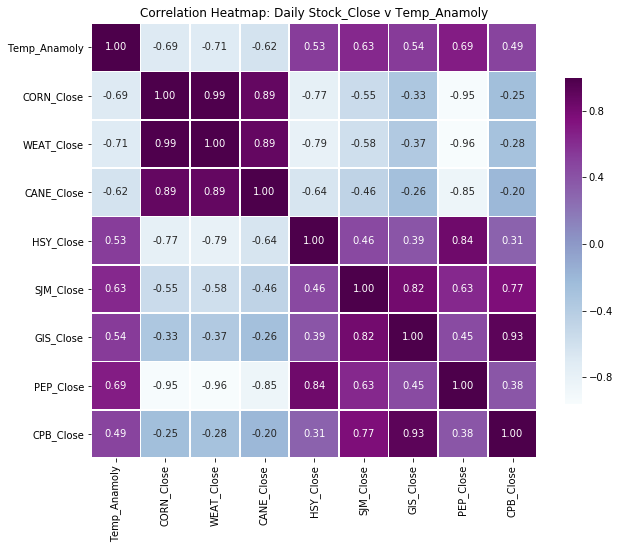

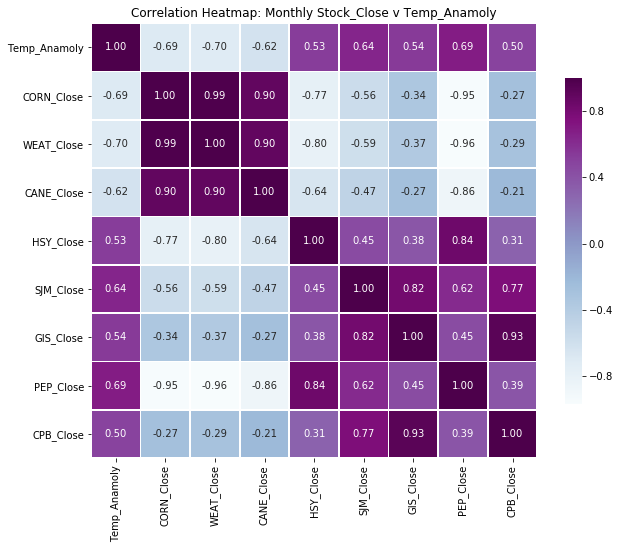

In [4]:
#correlation between daily stock_Close and Temp_Anamoly

#negative moderate: CORN, CANE
#positive moderate: HSY, SJM, GIS, PEP, CPB
#negative high: WEAT
stock_per_change = data[['Temp_Anamoly','CORN_Close','WEAT_Close','CANE_Close','HSY_Close','SJM_Close','GIS_Close','PEP_Close','CPB_Close']]
plt.figure(figsize = (10,8))
#Created a heatmap using Seaborn to display the correlation based on 'Spearman' method-annotation so that the numbers appear in each box
display = sns.heatmap(stock_per_change.corr(method = 'spearman'), annot=True, fmt='.2f', cmap='BuPu', linewidth=.75, cbar_kws={'shrink': .75})
#Created a title
plt.title('Correlation Heatmap: Daily Stock_Close v Temp_Anamoly')

#negative moderate: CORN, WEAT, CANE
#positive moderate: HSY, SJM, GIS, PEP, CPB
#correlation between monthly stock_Close and Temp_Anamoly
stock_per_change = data_month[['Temp_Anamoly','CORN_Close','WEAT_Close','CANE_Close','HSY_Close','SJM_Close','GIS_Close','PEP_Close','CPB_Close']]
plt.figure(figsize = (10,8))
#Created a heatmap using Seaborn to display the correlation based on 'Spearman' method-annotation so that the numbers appear in each box
display = sns.heatmap(stock_per_change.corr(method = 'spearman'), annot=True, fmt='.2f', cmap='BuPu', linewidth=.75, cbar_kws={'shrink': .75})
#Created a title
plt.title('Correlation Heatmap: Monthly Stock_Close v Temp_Anamoly')


## Calculations from Stock_Close features

### Profit
- profit = (Stock_Close x Volume)

In [5]:
#calculate daily profit for each stock 
data['CORN_profit'] = data['CORN_Close'] * data['CORN_Volume']
data['WEAT_profit'] = data['WEAT_Close'] * data['WEAT_Volume']
data['CANE_profit'] = data['CANE_Close'] * data['CANE_Volume']
data['HSY_profit'] = data['HSY_Close'] * data['HSY_Volume']
data['SJM_profit'] = data['SJM_Close'] * data['SJM_Volume']
data['GIS_profit'] = data['GIS_Close'] * data['GIS_Volume']
data['PEP_profit'] = data['PEP_Close'] * data['PEP_Volume']
data['CPB_profit'] = data['CPB_Close'] * data['CPB_Volume']

#calculate monthly profit for each stock 
data_month['CORN_profit'] = data_month['CORN_Close'] * data_month['CORN_Volume']
data_month['WEAT_profit'] = data_month['WEAT_Close'] * data_month['WEAT_Volume']
data_month['CANE_profit'] = data_month['CANE_Close'] * data_month['CANE_Volume']
data_month['HSY_profit'] = data_month['HSY_Close'] * data_month['HSY_Volume']
data_month['SJM_profit'] = data_month['SJM_Close'] * data_month['SJM_Volume']
data_month['GIS_profit'] = data_month['GIS_Close'] * data_month['GIS_Volume']
data_month['PEP_profit'] = data_month['PEP_Close'] * data_month['PEP_Volume']
data_month['CPB_profit'] = data_month['CPB_Close'] * data_month['CPB_Volume']

Text(0.5,1,'Correlation Heatmap: Monthly Stock_Profit v Temp_Anamoly')

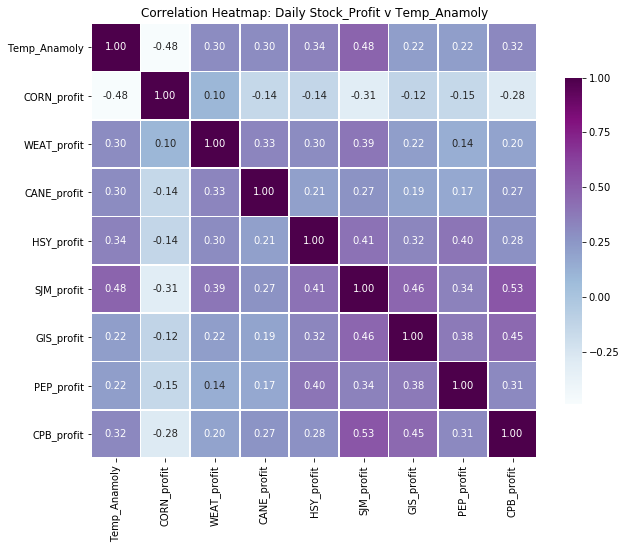

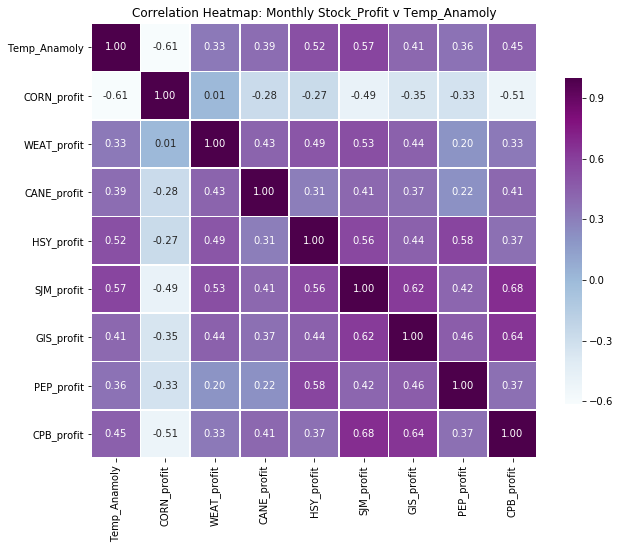

In [6]:
#correlation between daily profit and Temp_Anamoly

##low correlation between daily profit and Temp_Anamoly
stock_per_change = data[['Temp_Anamoly','CORN_profit','WEAT_profit','CANE_profit','HSY_profit','SJM_profit','GIS_profit','PEP_profit','CPB_profit']]
plt.figure(figsize = (10,8))
#Created a heatmap using Seaborn to display the correlation based on 'Spearman' method-annotation so that the numbers appear in each box
display = sns.heatmap(stock_per_change.corr(method = 'spearman'), annot=True, fmt='.2f', cmap='BuPu', linewidth=.75, cbar_kws={'shrink': .75})
#Created a title
plt.title('Correlation Heatmap: Daily Stock_Profit v Temp_Anamoly')

#correlation between monthly profit and Temp_Anamoly

#low correlation between Temp_Anamoly and Daily profit for WEAT, CANE, GIS, PEP, CPB
#moderate correlation between Temp_Anamoly and Daily profit for CORN, HSY, SJM, 
stock_per_change = data_month[['Temp_Anamoly','CORN_profit','WEAT_profit','CANE_profit','HSY_profit','SJM_profit','GIS_profit','PEP_profit','CPB_profit']]
plt.figure(figsize = (10,8))
#Created a heatmap using Seaborn to display the correlation based on 'Spearman' method-annotation so that the numbers appear in each box
display = sns.heatmap(stock_per_change.corr(method = 'spearman'), annot=True, fmt='.2f', cmap='BuPu', linewidth=.75, cbar_kws={'shrink': .75})
#Created a title
plt.title('Correlation Heatmap: Monthly Stock_Profit v Temp_Anamoly')

### Return

In [7]:
#https://medium.com/business-analysis/stock-market-analysis-project-722520891dce
#calculate daily return for stocks

data['CORN_return'] = data['CORN_Close'].pct_change(1)
data['WEAT_return'] = data['WEAT_Close'].pct_change(1)
data['CANE_return'] = data['CANE_Close'].pct_change(1)
data['HSY_return'] = data['HSY_Close'].pct_change(1)
data['SJM_return'] = data['SJM_Close'].pct_change(1)
data['GIS_return'] = data['GIS_Close'].pct_change(1)
data['PEP_return'] = data['PEP_Close'].pct_change(1)
data['CPB_return'] = data['CPB_Close'].pct_change(1)

#fill in NaN
data['CORN_return'].fillna(method='bfill', inplace = True)
data['WEAT_return'].fillna(method='bfill', inplace = True)
data['CANE_return'].fillna(method='bfill', inplace = True)
data['HSY_return'].fillna(method='bfill', inplace = True)
data['SJM_return'].fillna(method='bfill', inplace = True)
data['GIS_return'].fillna(method='bfill', inplace = True)
data['PEP_return'].fillna(method='bfill', inplace = True)
data['CPB_return'].fillna(method='bfill', inplace = True)

#calculate monthly return for stocks
data_month['CORN_return'] = data_month['CORN_Close'].pct_change(1)
data_month['WEAT_return'] = data_month['WEAT_Close'].pct_change(1)
data_month['CANE_return'] = data_month['CANE_Close'].pct_change(1)
data_month['HSY_return'] = data_month['HSY_Close'].pct_change(1)
data_month['SJM_return'] = data_month['SJM_Close'].pct_change(1)
data_month['GIS_return'] = data_month['GIS_Close'].pct_change(1)
data_month['PEP_return'] = data_month['PEP_Close'].pct_change(1)
data_month['CPB_return'] = data_month['CPB_Close'].pct_change(1)

#fill in NaN
data_month['CORN_return'].fillna(method='bfill', inplace = True)
data_month['WEAT_return'].fillna(method='bfill', inplace = True)
data_month['CANE_return'].fillna(method='bfill', inplace = True)
data_month['HSY_return'].fillna(method='bfill', inplace = True)
data_month['SJM_return'].fillna(method='bfill', inplace = True)
data_month['GIS_return'].fillna(method='bfill', inplace = True)
data_month['PEP_return'].fillna(method='bfill', inplace = True)
data_month['CPB_return'].fillna(method='bfill', inplace = True)

Text(0.5,1,'Correlation Heatmap: Monthly Stock_Return v Temp_Anamoly')

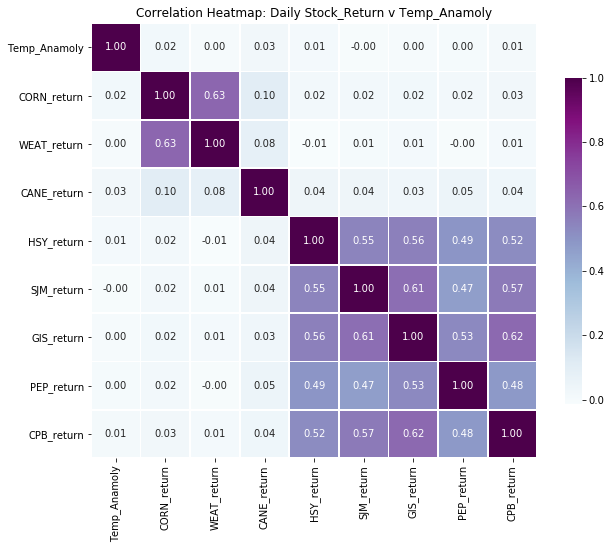

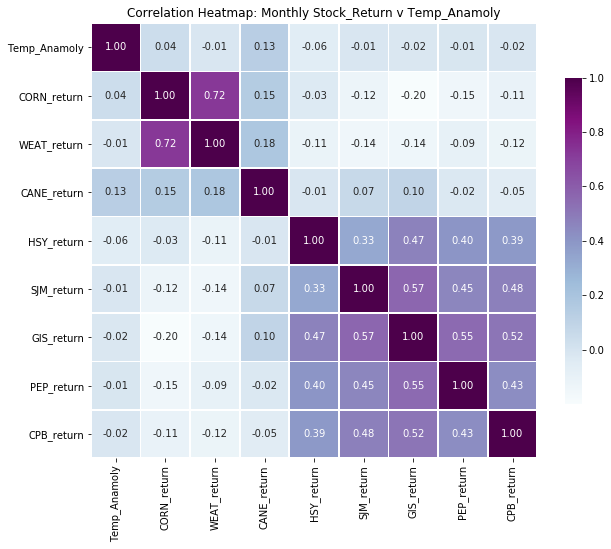

In [8]:
#https://medium.com/business-analysis/stock-market-analysis-project-722520891dce

#correlation between daily return values in stocks

#no correlation of Temp_Anamoly and daily stock return
stock_per_change = data[['Temp_Anamoly','CORN_return','WEAT_return','CANE_return','HSY_return','SJM_return','GIS_return','PEP_return','CPB_return']]
plt.figure(figsize = (10,8))
#Created a heatmap using Seaborn to display the correlation based on 'Spearman' method-annotation so that the numbers appear in each box
display = sns.heatmap(stock_per_change.corr(method = 'spearman'), annot=True, fmt='.2f', cmap='BuPu', linewidth=.75, cbar_kws={'shrink': .75})
#Created a title
plt.title('Correlation Heatmap: Daily Stock_Return v Temp_Anamoly')

#correlation between monthly return values in stocks

#no correlation between Temp_Anamoly and monthly stock return
stock_per_change = data_month[['Temp_Anamoly','CORN_return','WEAT_return','CANE_return','HSY_return','SJM_return','GIS_return','PEP_return','CPB_return']]
plt.figure(figsize = (10,8))
#Created a heatmap using Seaborn to display the correlation based on 'Spearman' method-annotation so that the numbers appear in each box
display = sns.heatmap(stock_per_change.corr(method = 'spearman'), annot=True, fmt='.2f', cmap='BuPu', linewidth=.75, cbar_kws={'shrink': .75})
#title
plt.title('Correlation Heatmap: Monthly Stock_Return v Temp_Anamoly')

### Cumulative Returns
- Cumulative return is the return computed relative to the day investment

In [9]:
#https://medium.com/business-analysis/stock-market-analysis-project-722520891dce

#cumulative returns for daily data
#Cumulative return is computed relative to the day investment. 
#If the cumulative return is above one-make a profit--anything else is a loss

data['CORN_cum_return'] = (1 + data['CORN_return']).cumprod()
data['WEAT_cum_return'] = (1 + data['WEAT_return']).cumprod()
data['CANE_cum_return'] = (1 + data['CANE_return']).cumprod()
data['HSY_cum_return'] = (1 + data['HSY_return']).cumprod()
data['SJM_cum_return'] = (1 + data['SJM_return']).cumprod()
data['GIS_cum_return'] = (1 + data['GIS_return']).cumprod()
data['PEP_cum_return'] = (1 + data['PEP_return']).cumprod()
data['CPB_cum_return'] = (1 + data['CPB_return']).cumprod()

#fill in NaN
data['CORN_cum_return'].fillna(method='bfill', inplace = True)
data['WEAT_cum_return'].fillna(method='bfill', inplace = True)
data['CANE_cum_return'].fillna(method='bfill', inplace = True)
data['HSY_cum_return'].fillna(method='bfill', inplace = True)
data['SJM_cum_return'].fillna(method='bfill', inplace = True)
data['GIS_cum_return'].fillna(method='bfill', inplace = True)
data['PEP_cum_return'].fillna(method='bfill', inplace = True)
data['CPB_cum_return'].fillna(method='bfill', inplace = True)

#cumulative return for monthly data
data_month['CORN_cum_return'] = (1 + data_month['CORN_return']).cumprod()
data_month['WEAT_cum_return'] = (1 + data_month['WEAT_return']).cumprod()
data_month['CANE_cum_return'] = (1 + data_month['CANE_return']).cumprod()
data_month['HSY_cum_return'] = (1 + data_month['HSY_return']).cumprod()
data_month['SJM_cum_return'] = (1 + data_month['SJM_return']).cumprod()
data_month['GIS_cum_return'] = (1 + data_month['GIS_return']).cumprod()
data_month['PEP_cum_return'] = (1 + data_month['PEP_return']).cumprod()
data_month['CPB_cum_return'] = (1 + data_month['CPB_return']).cumprod()

#fill in NaN
data['CORN_cum_return'].fillna(method='bfill', inplace = True)
data['WEAT_cum_return'].fillna(method='bfill', inplace = True)
data['CANE_cum_return'].fillna(method='bfill', inplace = True)
data['HSY_cum_return'].fillna(method='bfill', inplace = True)
data['SJM_cum_return'].fillna(method='bfill', inplace = True)
data['GIS_cum_return'].fillna(method='bfill', inplace = True)
data['PEP_cum_return'].fillna(method='bfill', inplace = True)
data['CPB_cum_return'].fillna(method='bfill', inplace = True)

Text(0.5,1,'Correlation Heatmap: Monthly Stock_cum_return v Temp_Anamoly')

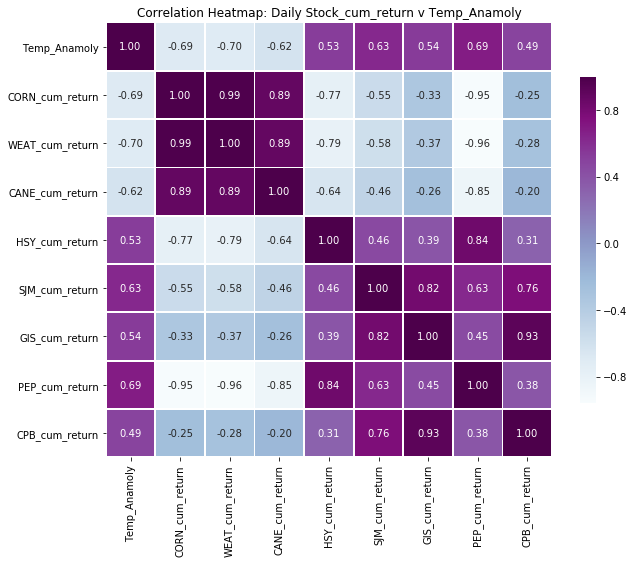

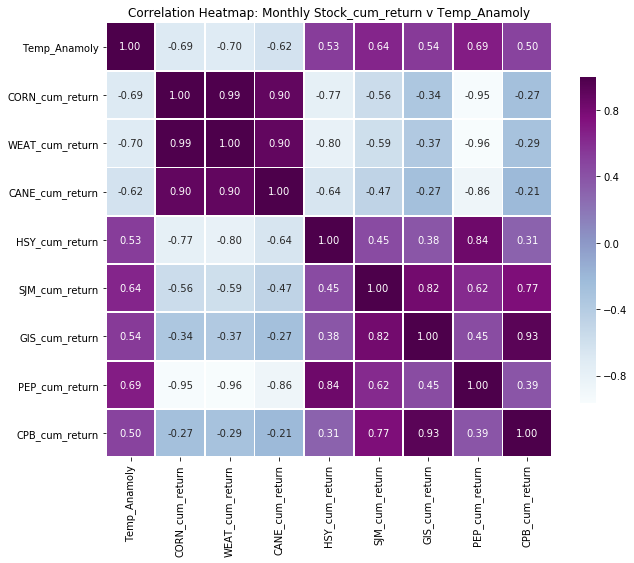

In [10]:
#Correlation with daily cumulative return
#moderate negative correlation of Temp_Anamoly with stock cumulative return
stock_per_change = data[['Temp_Anamoly','CORN_cum_return','WEAT_cum_return','CANE_cum_return','HSY_cum_return','SJM_cum_return',
                         'GIS_cum_return','PEP_cum_return','CPB_cum_return']]
plt.figure(figsize = (10,8))
#Created a heatmap using Seaborn to display the correlation based on 'Spearman' method-annotation so that the numbers appear in each box
display = sns.heatmap(stock_per_change.corr(method = 'spearman'), annot=True, fmt='.2f', cmap='BuPu', linewidth=.75, cbar_kws={'shrink': .75})
#title
plt.title('Correlation Heatmap: Daily Stock_cum_return v Temp_Anamoly')

#Correlation with monthly cumulative return
#moderate negative correlation
stock_per_change = data_month[['Temp_Anamoly','CORN_cum_return','WEAT_cum_return','CANE_cum_return','HSY_cum_return','SJM_cum_return',
                         'GIS_cum_return','PEP_cum_return','CPB_cum_return']]
plt.figure(figsize = (10,8))
#Created a heatmap using Seaborn to display the correlation based on 'Spearman' method-annotation so that the numbers appear in each box
display = sns.heatmap(stock_per_change.corr(method = 'spearman'), annot=True, fmt='.2f', cmap='BuPu', linewidth=.75, cbar_kws={'shrink': .75})
#title
plt.title('Correlation Heatmap: Monthly Stock_cum_return v Temp_Anamoly')

### Covariance

In [11]:
#finding the covariance for all daily stock close features
#Covariance measures for all closing pricing features and Temp_Anamoly
#covariance is above zero for all pairs (per rounding)--supports that variables most likely change together 

a = array(data['Temp_Anamoly'])
b = array(data['CORN_Close'])
c = array(data['WEAT_Close'])
d = array(data['CANE_Close'])
e = array(data['HSY_Close'])
f = array(data['SJM_Close'])
g = array(data['GIS_Close'])
h = array(data['PEP_Close'])
i = array(data['CPB_Close'])

j = array(data['CORN_profit'])
k = array(data['WEAT_profit'])
l = array(data['CANE_profit'])
m = array(data['HSY_profit'])
n = array(data['SJM_profit'])
o = array(data['GIS_profit'])
p = array(data['PEP_profit'])
q = array(data['CPB_profit'])

r = array(data['CORN_return'])
s = array(data['WEAT_return'])
t = array(data['CANE_return'])
u = array(data['HSY_return'])
v = array(data['SJM_return'])
w = array(data['GIS_return'])
x = array(data['PEP_return'])
y = array(data['CPB_return'])

z = array(data['CORN_cum_return'])
aa = array(data['WEAT_cum_return'])
bb = array(data['CANE_cum_return'])
cc = array(data['HSY_cum_return'])
dd = array(data['SJM_cum_return'])
ee = array(data['GIS_cum_return'])
ff = array(data['PEP_cum_return'])
gg = array(data['CPB_cum_return'])

print('Daily Covariance Temp_Anamoly V Stock')
print('CORN')
covariance1a = cov(a,b)[0,1]
print('Covariance of Temp_Anamoly and CORN_Close',covariance1a)
covariance1b = cov(a,j)[0,1]
print('Covariance of Temp_Anamoly and CORN_profit',covariance1b)
covariance1c = cov(a,r)[0,1]
print('Covariance of Temp_Anamoly and CORN_return',covariance1c)
covariance1d = cov(a,z)[0,1]
print('Covariance of Temp_Anamoly and CORN_cum_return',covariance1d)

print('WEAT')
covariance2a = cov(a,c)[0,1]
print('Covariance of Temp_Anamoly and WEAT_Close',covariance2a)
covariance2b = cov(a,k)[0,1]
print('Covariance of Temp_Anamoly and WEAT_profit',covariance2b)
covariance2c = cov(a,s)[0,1]
print('Covariance of Temp_Anamoly and WEAT_return',covariance2c)
covariance2d = cov(a,aa)[0,1]
print('Covariance of Temp_Anamoly and WEAT_cum_return',covariance2d)

print('CANE')
covariance3a = cov(a,d)[0,1]
print('Covariance of Temp_Anamoly and CANE_Close',covariance3a)
covariance3b = cov(a,l)[0,1]
print('Covariance of Temp_Anamoly and CANE_profit',covariance3b)
covariance3c = cov(a,t)[0,1]
print('Covariance of Temp_Anamoly and CANE_return',covariance3c)
covariance3d = cov(a,bb)[0,1]
print('Covariance of Temp_Anamoly and CANE_cum_return',covariance3d)

print('HSY')
covariance4a = cov(a,e)[0,1]
print('Covariance of Temp_Anamoly and HSY_Close',covariance4a)
covariance4b = cov(a,m)[0,1]
print('Covariance of Temp_Anamoly and HSY_profit',covariance4b)
covariance4c = cov(a,u)[0,1]
print('Covariance of Temp_Anamoly and HSY_return',covariance4c)
covariance4d = cov(a,cc)[0,1]
print('Covariance of Temp_Anamoly and HSY_cum_return',covariance4d)

print('SJM')
covariance5a = cov(a,f)[0,1]
print('Covariance of Temp_Anamoly and SJM_Close',covariance5a)
covariance5b = cov(a,n)[0,1]
print('Covariance of Temp_Anamoly and SJM_profit',covariance5b)
covariance5c = cov(a,v)[0,1]
print('Covariance of Temp_Anamoly and SJM_return',covariance5c)
covariance5d = cov(a,dd)[0,1]
print('Covariance of Temp_Anamoly and SJM_cum_return',covariance5d)

print('GIS')
covariance6a = cov(a,g)[0,1]
print('Covariance of Temp_Anamoly and GIS_Close',covariance6a)
covariance6b = cov(a,o)[0,1]
print('Covariance of Temp_Anamoly and GIS_profit',covariance6b)
covariance6c = cov(a,w)[0,1]
print('Covariance of Temp_Anamoly and GIS_return',covariance6c)
covariance6d = cov(a,ee)[0,1]
print('Covariance of Temp_Anamoly and GIS_cum_return',covariance6d)

print('PEP')
covariance7a = cov(a,h)[0,1]
print('Covariance of Temp_Anamoly and PEP_Close',covariance7a)
covariance7b = cov(a,p)[0,1]
print('Covariance of Temp_Anamoly and PEP_profit',covariance7b)
covariance7c = cov(a,x)[0,1]
print('Covariance of Temp_Anamoly and PEP_return',covariance7c)
covariance7d = cov(a,ff)[0,1]
print('Covariance of Temp_Anamoly and PEP_cum_return',covariance7d)

print('CPB')
covariance8a = cov(a,i)[0,1]
print('Covariance of Temp_Anamoly and CPB_Close',covariance8a)
covariance8b = cov(a,q)[0,1]
print('Covariance of Temp_Anamoly and CPB_profit',covariance8b)
covariance8c = cov(a,y)[0,1]
print('Covariance of Temp_Anamoly and CPB_return',covariance8c)
covariance8d = cov(a,gg)[0,1]
print('Covariance of Temp_Anamoly and CPB_cum_return',covariance8d)

Daily Covariance Temp_Anamoly V Stock
CORN
Covariance of Temp_Anamoly and CORN_Close -1.1382527258379114
Covariance of Temp_Anamoly and CORN_profit -185198.49115541205
Covariance of Temp_Anamoly and CORN_return 1.58504856322183e-06
Covariance of Temp_Anamoly and CORN_cum_return -0.026638079653732535
WEAT
Covariance of Temp_Anamoly and WEAT_Close -0.6546277128131264
Covariance of Temp_Anamoly and WEAT_profit 18350.600169989517
Covariance of Temp_Anamoly and WEAT_return -3.987159343439306e-06
Covariance of Temp_Anamoly and WEAT_cum_return -0.02880897835283191
CANE
Covariance of Temp_Anamoly and CANE_Close -0.4485527336231245
Covariance of Temp_Anamoly and CANE_profit 7057.7236892592755
Covariance of Temp_Anamoly and CANE_return 6.571187004042887e-05
Covariance of Temp_Anamoly and CANE_cum_return -0.019250270029464008
HSY
Covariance of Temp_Anamoly and HSY_Close 1.5061099678903205
Covariance of Temp_Anamoly and HSY_profit 2172184.3649157216
Covariance of Temp_Anamoly and HSY_return -1.299

In [12]:
#finding the covariance for all monthly stock close features
#Covariance measures for all closing pricing features and Temp_Anamoly
#covariance is above zero for all pairs (per rounding)--supports that variables most likely change together 

a1 = array(data_month['Temp_Anamoly'])
b1 = array(data_month['CORN_Close'])
c1 = array(data_month['WEAT_Close'])
d1 = array(data_month['CANE_Close'])
e1 = array(data_month['HSY_Close'])
f1 = array(data_month['SJM_Close'])
g1 = array(data_month['GIS_Close'])
h1 = array(data_month['PEP_Close'])
i1 = array(data_month['CPB_Close'])

j1 = array(data_month['CORN_profit'])
k1= array(data_month['WEAT_profit'])
l1 = array(data_month['CANE_profit'])
m1 = array(data_month['HSY_profit'])
n1 = array(data_month['SJM_profit'])
o1 = array(data_month['GIS_profit'])
p1 = array(data_month['PEP_profit'])
q1 = array(data_month['CPB_profit'])

r1 = array(data_month['CORN_return'])
s1 = array(data_month['WEAT_return'])
t1 = array(data_month['CANE_return'])
u1 = array(data_month['HSY_return'])
v1 = array(data_month['SJM_return'])
w1 = array(data_month['GIS_return'])
x1 = array(data_month['PEP_return'])
y1 = array(data_month['CPB_return'])

z1 = array(data_month['CORN_cum_return'])
aa1 = array(data_month['WEAT_cum_return'])
bb1 = array(data_month['CANE_cum_return'])
cc1 = array(data_month['HSY_cum_return'])
dd1 = array(data_month['SJM_cum_return'])
ee1 = array(data_month['GIS_cum_return'])
ff1 = array(data_month['PEP_cum_return'])
gg1 = array(data_month['CPB_cum_return'])

print('Monthly Covariance Temp_Anamoly V Stock')
print('CORN')
covariance1a = cov(a1,b1)[0,1]
print('Covariance of Temp_Anamoly and CORN_Close',covariance1a)
covariance1b = cov(a1,j1)[0,1]
print('Covariance of Temp_Anamoly and CORN_profit',covariance1b)
covariance1c = cov(a1,r1)[0,1]
print('Covariance of Temp_Anamoly and CORN_return',covariance1c)
covariance1d = cov(a1,z1)[0,1]
print('Covariance of Temp_Anamoly and CORN_cum_return',covariance1d)

print('WEAT')
covariance2a = cov(a1,c1)[0,1]
print('Covariance of Temp_Anamoly and WEAT_Close',covariance2a)
covariance2b = cov(a1,k1)[0,1]
print('Covariance of Temp_Anamoly and WEAT_profit',covariance2b)
covariance2c = cov(a1,s1)[0,1]
print('Covariance of Temp_Anamoly and WEAT_return',covariance2c)
covariance2d = cov(a1,aa1)[0,1]
print('Covariance of Temp_Anamoly and WEAT_cum_return',covariance2d)

print('CANE')
covariance3a = cov(a1,d1)[0,1]
print('Covariance of Temp_Anamoly and CANE_Close',covariance3a)
covariance3b = cov(a1,l1)[0,1]
print('Covariance of Temp_Anamoly and CANE_profit',covariance3b)
covariance3c = cov(a1,t1)[0,1]
print('Covariance of Temp_Anamoly and CANE_return',covariance3c)
covariance3d = cov(a1,bb1)[0,1]
print('Covariance of Temp_Anamoly and CANE_cum_return',covariance3d)

print('HSY')
covariance4a = cov(a1,e1)[0,1]
print('Covariance of Temp_Anamoly and HSY_Close',covariance4a)
covariance4b = cov(a1,m1)[0,1]
print('Covariance of Temp_Anamoly and HSY_profit',covariance4b)
covariance4c = cov(a1,u1)[0,1]
print('Covariance of Temp_Anamoly and HSY_return',covariance4c)
covariance4d = cov(a1,cc1)[0,1]
print('Covariance of Temp_Anamoly and HSY_cum_return',covariance4d)

print('SJM')
covariance5a = cov(a1,f1)[0,1]
print('Covariance of Temp_Anamoly and SJM_Close',covariance5a)
covariance5b = cov(a1,n1)[0,1]
print('Covariance of Temp_Anamoly and SJM_profit',covariance5b)
covariance5c = cov(a1,v1)[0,1]
print('Covariance of Temp_Anamoly and SJM_return',covariance5c)
covariance5d = cov(a1,dd1)[0,1]
print('Covariance of Temp_Anamoly and SJM_cum_return',covariance5d)

print('GIS')
covariance6a = cov(a1,g1)[0,1]
print('Covariance of Temp_Anamoly and GIS_Close',covariance6a)
covariance6b = cov(a1,o1)[0,1]
print('Covariance of Temp_Anamoly and GIS_profit',covariance6b)
covariance6c = cov(a1,w1)[0,1]
print('Covariance of Temp_Anamoly and GIS_return',covariance6c)
covariance6d = cov(a1,ee1)[0,1]
print('Covariance of Temp_Anamoly and GIS_cum_return',covariance6d)

print('PEP')
covariance7a = cov(a1,h1)[0,1]
print('Covariance of Temp_Anamoly and PEP_Close',covariance7a)
covariance7b = cov(a1,p1)[0,1]
print('Covariance of Temp_Anamoly and PEP_profit',covariance7b)
covariance7c = cov(a1,x1)[0,1]
print('Covariance of Temp_Anamoly and PEP_return',covariance7c)
covariance7d = cov(a1,ff1)[0,1]
print('Covariance of Temp_Anamoly and PEP_cum_return',covariance7d)

print('CPB')
covariance8a = cov(a1,i1)[0,1]
print('Covariance of Temp_Anamoly and CPB_Close',covariance8a)
covariance8b = cov(a1,q1)[0,1]
print('Covariance of Temp_Anamoly and CPB_profit',covariance8b)
covariance8c = cov(a1,y1)[0,1]
print('Covariance of Temp_Anamoly and CPB_return',covariance8c)
covariance8d = cov(a1,gg1)[0,1]
print('Covariance of Temp_Anamoly and CPB_cum_return',covariance8d)

Monthly Covariance Temp_Anamoly V Stock
CORN
Covariance of Temp_Anamoly and CORN_Close -1.1534558774493961
Covariance of Temp_Anamoly and CORN_profit -186579.36027291414
Covariance of Temp_Anamoly and CORN_return -0.0002918565636518181
Covariance of Temp_Anamoly and CORN_cum_return -0.02833974155487258
WEAT
Covariance of Temp_Anamoly and WEAT_Close -0.6632624820760709
Covariance of Temp_Anamoly and WEAT_profit 18759.492932628662
Covariance of Temp_Anamoly and WEAT_return -0.00024469088294407207
Covariance of Temp_Anamoly and WEAT_cum_return -0.030627763199485486
CANE
Covariance of Temp_Anamoly and CANE_Close -0.45565727374435633
Covariance of Temp_Anamoly and CANE_profit 6943.182995942329
Covariance of Temp_Anamoly and CANE_return 0.0016354301794104596
Covariance of Temp_Anamoly and CANE_cum_return -0.019536560256708507
HSY
Covariance of Temp_Anamoly and HSY_Close 1.518272665763923
Covariance of Temp_Anamoly and HSY_profit 2217897.224792651
Covariance of Temp_Anamoly and HSY_return -0.

### Granger Causality

### Null hyp: Stock_Close is not Granger caused by Temp Anamoly

In [13]:
#evaluation if the daily closing price for the stock is caused by Temp_Anamoly through Granger Causality
print('CORN_Close',grangercausalitytests(data[['Temp_Anamoly','CORN_Close']], maxlag=4)) #reject NULL
print('WEAT_Close',grangercausalitytests(data[['Temp_Anamoly','WEAT_Close']], maxlag=4)) #reject NULL
print('CANE_Close',grangercausalitytests(data[['Temp_Anamoly','CANE_Close']], maxlag=4)) #ACCEPT NULL
print('HSY_Close',grangercausalitytests(data[['Temp_Anamoly','HSY_Close']], maxlag=4)) #ACCEPT NULL
print('SJM_Close',grangercausalitytests(data[['Temp_Anamoly','SJM_Close']], maxlag=4)) #ACCEPT NULL
print('GIS_Close',grangercausalitytests(data[['Temp_Anamoly','GIS_Close']], maxlag=4)) #ACCEPT NULL
print('PEP_Close',grangercausalitytests(data[['Temp_Anamoly','PEP_Close']], maxlag=4)) #reject NULL
print('CPB_Close',grangercausalitytests(data[['Temp_Anamoly','CPB_Close']], maxlag=4)) #ACCEPT NULL


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=6.9753  , p=0.0083  , df_denom=2008, df_num=1
ssr based chi2 test:   chi2=6.9858  , p=0.0082  , df=1
likelihood ratio test: chi2=6.9737  , p=0.0083  , df=1
parameter F test:         F=6.9753  , p=0.0083  , df_denom=2008, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=9.7840  , p=0.0001  , df_denom=2005, df_num=2
ssr based chi2 test:   chi2=19.6169 , p=0.0001  , df=2
likelihood ratio test: chi2=19.5218 , p=0.0001  , df=2
parameter F test:         F=9.7840  , p=0.0001  , df_denom=2005, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=6.7040  , p=0.0002  , df_denom=2002, df_num=3
ssr based chi2 test:   chi2=20.1823 , p=0.0002  , df=3
likelihood ratio test: chi2=20.0816 , p=0.0002  , df=3
parameter F test:         F=6.7040  , p=0.0002  , df_denom=2002, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=5.2012  , p=0.

In [14]:
#evaluation if the monthly closing price for the stock is caused by Temp_Anamoly through Granger Causality
print('CORN_Close',grangercausalitytests(data_month[['Temp_Anamoly','CORN_Close']], maxlag=4)) #reject NULL
print('WEAT_Close',grangercausalitytests(data_month[['Temp_Anamoly','WEAT_Close']], maxlag=4)) #reject NULL
print('CANE_Close',grangercausalitytests(data_month[['Temp_Anamoly','CANE_Close']], maxlag=4)) #reject NULL
print('HSY_Close',grangercausalitytests(data_month[['Temp_Anamoly','HSY_Close']], maxlag=4)) #ACCEPT NULL
print('SJM_Close',grangercausalitytests(data_month[['Temp_Anamoly','SJM_Close']], maxlag=4)) #ACCEPT NULL
print('GIS_Close',grangercausalitytests(data_month[['Temp_Anamoly','GIS_Close']], maxlag=4)) #ACCEPT NULL
print('PEP_Close',grangercausalitytests(data_month[['Temp_Anamoly','PEP_Close']], maxlag=4)) #ACCEPT NULL
print('CPB_Close',grangercausalitytests(data_month[['Temp_Anamoly','CPB_Close']], maxlag=4)) #ACCEPT NULL


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=7.9802  , p=0.0058  , df_denom=92, df_num=1
ssr based chi2 test:   chi2=8.2404  , p=0.0041  , df=1
likelihood ratio test: chi2=7.9024  , p=0.0049  , df=1
parameter F test:         F=7.9802  , p=0.0058  , df_denom=92, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=3.4801  , p=0.0351  , df_denom=89, df_num=2
ssr based chi2 test:   chi2=7.3512  , p=0.0253  , df=2
likelihood ratio test: chi2=7.0779  , p=0.0290  , df=2
parameter F test:         F=3.4801  , p=0.0351  , df_denom=89, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=2.9263  , p=0.0383  , df_denom=86, df_num=3
ssr based chi2 test:   chi2=9.4935  , p=0.0234  , df=3
likelihood ratio test: chi2=9.0396  , p=0.0288  , df=3
parameter F test:         F=2.9263  , p=0.0383  , df_denom=86, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=2.1385  , p=0.0832  , df_d

### Null hyp: Stock_profit is not granger caused by Temp_Anamoly

In [15]:
#evaluation if the daily closing profit for the stock is caused by Temp_Anamoly through Granger Causality
print('CORN_profit',grangercausalitytests(data[['Temp_Anamoly','CORN_profit']], maxlag=4)) #accept NULL
print('WEAT_profit',grangercausalitytests(data[['Temp_Anamoly','WEAT_profit']], maxlag=4)) #accept NULL
print('CANE_profit',grangercausalitytests(data[['Temp_Anamoly','CANE_profit']], maxlag=4)) #accept NULL
print('HSY_profit',grangercausalitytests(data[['Temp_Anamoly','HSY_profit']], maxlag=4)) #accept NULL
print('SJM_profit',grangercausalitytests(data[['Temp_Anamoly','SJM_profit']], maxlag=4)) #accept NULL
print('GIS_profit',grangercausalitytests(data[['Temp_Anamoly','GIS_profit']], maxlag=4)) #accept NULL
print('PEP_profit',grangercausalitytests(data[['Temp_Anamoly','PEP_profit']], maxlag=4)) #accept NULL
print('CPB_profit',grangercausalitytests(data[['Temp_Anamoly','CPB_profit']], maxlag=4)) #accept NULL


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2864  , p=0.5926  , df_denom=2008, df_num=1
ssr based chi2 test:   chi2=0.2868  , p=0.5923  , df=1
likelihood ratio test: chi2=0.2868  , p=0.5923  , df=1
parameter F test:         F=0.2864  , p=0.5926  , df_denom=2008, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.1515  , p=0.8594  , df_denom=2005, df_num=2
ssr based chi2 test:   chi2=0.3038  , p=0.8591  , df=2
likelihood ratio test: chi2=0.3038  , p=0.8591  , df=2
parameter F test:         F=0.1515  , p=0.8594  , df_denom=2005, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.1150  , p=0.9513  , df_denom=2002, df_num=3
ssr based chi2 test:   chi2=0.3463  , p=0.9511  , df=3
likelihood ratio test: chi2=0.3463  , p=0.9511  , df=3
parameter F test:         F=0.1150  , p=0.9513  , df_denom=2002, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.1886  , p=0.

In [16]:
#evaluation if the monthly closing profit for the stock is caused by Temp_Anamoly through Granger Causality
print('CORN_profit',grangercausalitytests(data_month[['Temp_Anamoly','CORN_profit']], maxlag=4)) #accept NULL
print('WEAT_profit',grangercausalitytests(data_month[['Temp_Anamoly','WEAT_profit']], maxlag=4)) #accept NULL
print('CANE_profit',grangercausalitytests(data_month[['Temp_Anamoly','CANE_profit']], maxlag=4)) #accept NULL
print('HSY_profit',grangercausalitytests(data_month[['Temp_Anamoly','HSY_profit']], maxlag=4)) #reject NULL
print('SJM_profit',grangercausalitytests(data_month[['Temp_Anamoly','SJM_profit']], maxlag=4)) #accept NULL
print('GIS_profit',grangercausalitytests(data_month[['Temp_Anamoly','GIS_profit']], maxlag=4)) #accept NULL
print('PEP_profit',grangercausalitytests(data_month[['Temp_Anamoly','PEP_profit']], maxlag=4)) #accept NULL
print('CPB_profit',grangercausalitytests(data_month[['Temp_Anamoly','CPB_profit']], maxlag=4)) #accept NULL


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0325  , p=0.8573  , df_denom=92, df_num=1
ssr based chi2 test:   chi2=0.0336  , p=0.8546  , df=1
likelihood ratio test: chi2=0.0336  , p=0.8546  , df=1
parameter F test:         F=0.0325  , p=0.8573  , df_denom=92, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.0914  , p=0.9128  , df_denom=89, df_num=2
ssr based chi2 test:   chi2=0.1930  , p=0.9080  , df=2
likelihood ratio test: chi2=0.1928  , p=0.9081  , df=2
parameter F test:         F=0.0914  , p=0.9128  , df_denom=89, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.7229  , p=0.5411  , df_denom=86, df_num=3
ssr based chi2 test:   chi2=2.3451  , p=0.5039  , df=3
likelihood ratio test: chi2=2.3160  , p=0.5095  , df=3
parameter F test:         F=0.7229  , p=0.5411  , df_denom=86, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.3495  , p=0.8437  , df_d

### Null hyp: Stock_return is not granger caused by Temp_Anamoly

In [17]:
#evaluation if the daily return for the stock is caused by Temp_Anamoly through Granger Causality
print('CORN_return',grangercausalitytests(data[['Temp_Anamoly','CORN_return']], maxlag=4)) #reject NULL
print('WEAT_return',grangercausalitytests(data[['Temp_Anamoly','WEAT_return']], maxlag=4)) #reject NULL
print('CANE_return',grangercausalitytests(data[['Temp_Anamoly','CANE_return']], maxlag=4)) #ACCEPT NULL
print('HSY_return',grangercausalitytests(data[['Temp_Anamoly','HSY_return']], maxlag=4)) #ACCEPT NULL
print('SJM_return',grangercausalitytests(data[['Temp_Anamoly','SJM_return']], maxlag=4)) #ACCEPT NULL
print('GIS_return',grangercausalitytests(data[['Temp_Anamoly','GIS_return']], maxlag=4)) #ACCEPT NULL
print('PEP_return',grangercausalitytests(data[['Temp_Anamoly','PEP_return']], maxlag=4)) #ACCEPT NULL
print('CPB_return',grangercausalitytests(data[['Temp_Anamoly','CPB_return']], maxlag=4)) #ACCEPT NULL


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=11.7551 , p=0.0006  , df_denom=2008, df_num=1
ssr based chi2 test:   chi2=11.7726 , p=0.0006  , df=1
likelihood ratio test: chi2=11.7383 , p=0.0006  , df=1
parameter F test:         F=11.7551 , p=0.0006  , df_denom=2008, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=6.0898  , p=0.0023  , df_denom=2005, df_num=2
ssr based chi2 test:   chi2=12.2099 , p=0.0022  , df=2
likelihood ratio test: chi2=12.1730 , p=0.0023  , df=2
parameter F test:         F=6.0898  , p=0.0023  , df_denom=2005, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=4.4380  , p=0.0041  , df_denom=2002, df_num=3
ssr based chi2 test:   chi2=13.3606 , p=0.0039  , df=3
likelihood ratio test: chi2=13.3164 , p=0.0040  , df=3
parameter F test:         F=4.4380  , p=0.0041  , df_denom=2002, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=3.4654  , p=0.

In [18]:
#evaluation if the monthly return for the stock is caused by Temp_Anamoly through Granger Causality
print('CORN_return',grangercausalitytests(data_month[['Temp_Anamoly','CORN_return']], maxlag=4)) #ACCEPT NULL
print('WEAT_return',grangercausalitytests(data_month[['Temp_Anamoly','WEAT_return']], maxlag=4)) #ACCEPT NULL
print('CANE_return',grangercausalitytests(data_month[['Temp_Anamoly','CANE_return']], maxlag=4)) #ACCEPT NULL
print('HSY_return',grangercausalitytests(data_month[['Temp_Anamoly','HSY_return']], maxlag=4)) #ACCEPT NULL
print('SJM_return',grangercausalitytests(data_month[['Temp_Anamoly','SJM_return']], maxlag=4)) #ACCEPT NULL
print('GIS_return',grangercausalitytests(data_month[['Temp_Anamoly','GIS_return']], maxlag=4)) #ACCEPT NULL
print('PEP_return',grangercausalitytests(data_month[['Temp_Anamoly','PEP_return']], maxlag=4)) #ACCEPT NULL
print('CPB_return',grangercausalitytests(data_month[['Temp_Anamoly','CPB_return']], maxlag=4)) #ACCEPT NULL


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0457  , p=0.8312  , df_denom=92, df_num=1
ssr based chi2 test:   chi2=0.0472  , p=0.8281  , df=1
likelihood ratio test: chi2=0.0472  , p=0.8281  , df=1
parameter F test:         F=0.0457  , p=0.8312  , df_denom=92, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.3314  , p=0.7188  , df_denom=89, df_num=2
ssr based chi2 test:   chi2=0.7000  , p=0.7047  , df=2
likelihood ratio test: chi2=0.6974  , p=0.7056  , df=2
parameter F test:         F=0.3314  , p=0.7188  , df_denom=89, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.3981  , p=0.7547  , df_denom=86, df_num=3
ssr based chi2 test:   chi2=1.2914  , p=0.7312  , df=3
likelihood ratio test: chi2=1.2825  , p=0.7333  , df=3
parameter F test:         F=0.3981  , p=0.7547  , df_denom=86, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.4275  , p=0.7884  , df_d

### Null hyp: Stock_cum_return is not granger caused by Temp_Anamoly

In [19]:
#evaluation if the cumulative return for the daily stock data is caused by Temp_Anamoly through Granger Causality
print('CORN_cum_return',grangercausalitytests(data[['Temp_Anamoly','CORN_cum_return']], maxlag=4)) #REJECT null
print('WEAT_cum_return',grangercausalitytests(data[['Temp_Anamoly','WEAT_cum_return']], maxlag=4)) #REJECT null
print('CANE_cum_return',grangercausalitytests(data[['Temp_Anamoly','CANE_cum_return']], maxlag=4)) #ACCEPT null
print('HSY_cum_return',grangercausalitytests(data[['Temp_Anamoly','HSY_cum_return']], maxlag=4)) #ACCEPT null
print('SJM_cum_return',grangercausalitytests(data[['Temp_Anamoly','SJM_cum_return']], maxlag=4)) #accept null
print('GIS_cum_return',grangercausalitytests(data[['Temp_Anamoly','GIS_cum_return']], maxlag=4)) #accept null
print('PEP_cum_return',grangercausalitytests(data[['Temp_Anamoly','PEP_cum_return']], maxlag=4)) #REJECT null
print('CPB_cum_return',grangercausalitytests(data[['Temp_Anamoly','CPB_cum_return']], maxlag=4)) #accept null


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=6.9753  , p=0.0083  , df_denom=2008, df_num=1
ssr based chi2 test:   chi2=6.9858  , p=0.0082  , df=1
likelihood ratio test: chi2=6.9737  , p=0.0083  , df=1
parameter F test:         F=6.9753  , p=0.0083  , df_denom=2008, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=9.7840  , p=0.0001  , df_denom=2005, df_num=2
ssr based chi2 test:   chi2=19.6169 , p=0.0001  , df=2
likelihood ratio test: chi2=19.5218 , p=0.0001  , df=2
parameter F test:         F=9.7840  , p=0.0001  , df_denom=2005, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=6.7040  , p=0.0002  , df_denom=2002, df_num=3
ssr based chi2 test:   chi2=20.1823 , p=0.0002  , df=3
likelihood ratio test: chi2=20.0816 , p=0.0002  , df=3
parameter F test:         F=6.7040  , p=0.0002  , df_denom=2002, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=5.2012  , p=0.

In [20]:
#evaluation if the cumulative return for the monthly stock data is caused by Temp_Anamoly through Granger Causality
print('CORN_cum_return',grangercausalitytests(data_month[['Temp_Anamoly','CORN_cum_return']], maxlag=4)) #REJECT null
print('WEAT_cum_return',grangercausalitytests(data_month[['Temp_Anamoly','WEAT_cum_return']], maxlag=4)) #REJECT null
print('CANE_cum_return',grangercausalitytests(data_month[['Temp_Anamoly','CANE_cum_return']], maxlag=4)) #REJECT null
print('HSY_cum_return',grangercausalitytests(data_month[['Temp_Anamoly','HSY_cum_return']], maxlag=4)) #accept null
print('SJM_cum_return',grangercausalitytests(data_month[['Temp_Anamoly','SJM_cum_return']], maxlag=4)) #accept null
print('GIS_cum_return',grangercausalitytests(data_month[['Temp_Anamoly','GIS_cum_return']], maxlag=4)) #accept null
print('PEP_cum_return',grangercausalitytests(data_month[['Temp_Anamoly','PEP_cum_return']], maxlag=4)) #accept null
print('CPB_cum_return',grangercausalitytests(data_month[['Temp_Anamoly','CPB_cum_return']], maxlag=4)) #accept null


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=7.9802  , p=0.0058  , df_denom=92, df_num=1
ssr based chi2 test:   chi2=8.2404  , p=0.0041  , df=1
likelihood ratio test: chi2=7.9024  , p=0.0049  , df=1
parameter F test:         F=7.9802  , p=0.0058  , df_denom=92, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=3.4801  , p=0.0351  , df_denom=89, df_num=2
ssr based chi2 test:   chi2=7.3512  , p=0.0253  , df=2
likelihood ratio test: chi2=7.0779  , p=0.0290  , df=2
parameter F test:         F=3.4801  , p=0.0351  , df_denom=89, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=2.9263  , p=0.0383  , df_denom=86, df_num=3
ssr based chi2 test:   chi2=9.4935  , p=0.0234  , df=3
likelihood ratio test: chi2=9.0396  , p=0.0288  , df=3
parameter F test:         F=2.9263  , p=0.0383  , df_denom=86, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=2.1385  , p=0.0832  , df_d

# Research Question 3
**3. What relationship (if any) exists between commodity stocks and company stocks?**

### Correlation

Text(0.5,1,'Correlation Heatmap: Monthly Close')

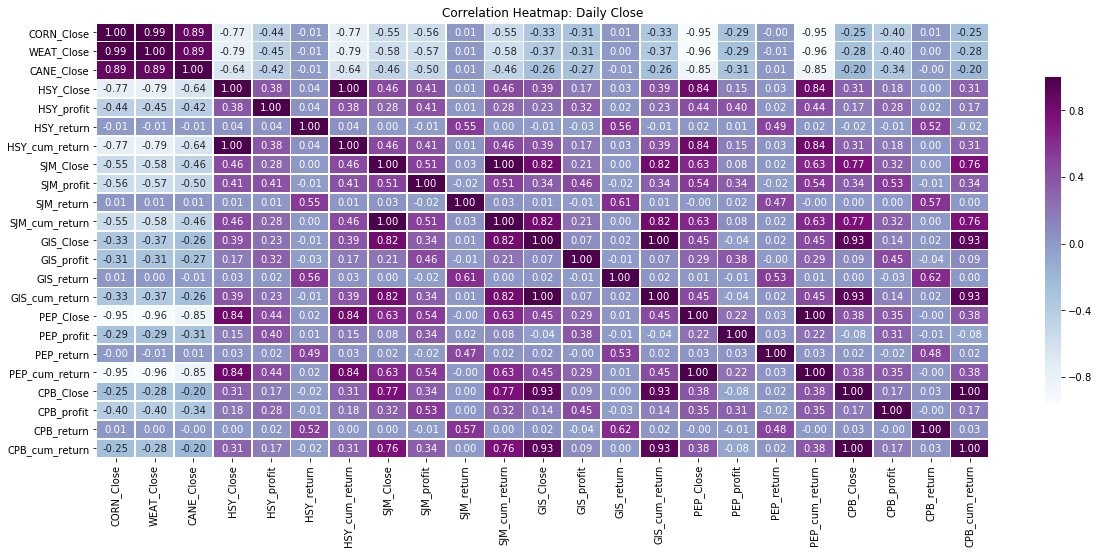

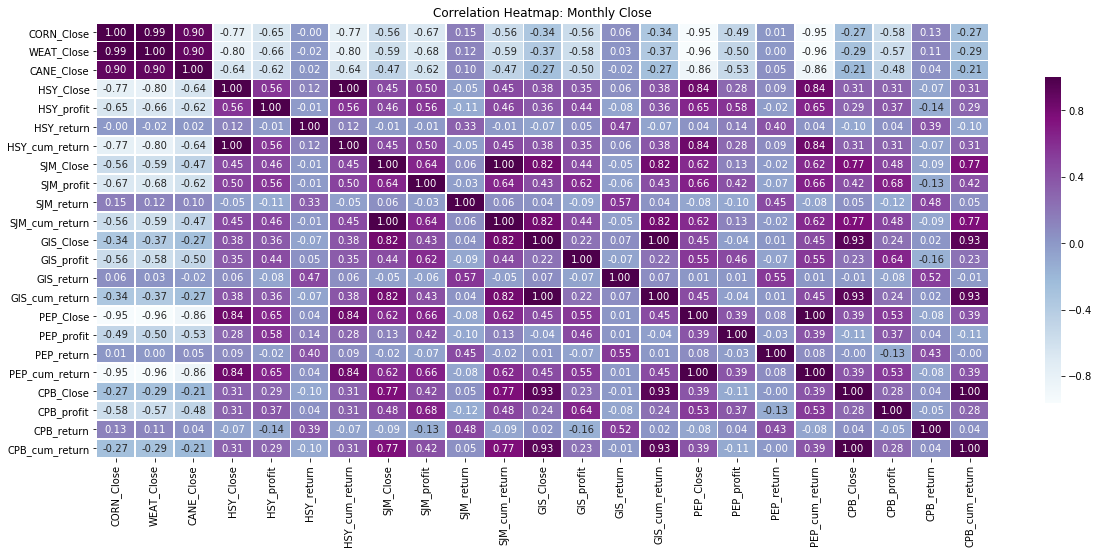

In [13]:
#correlation between daily stock_Close and company stocks

#negative moderate: CORN, CANE
#positive moderate: HSY, SJM, GIS, PEP, CPB
#negative high: WEAT
stock_per_change = data[['CORN_Close','WEAT_Close','CANE_Close','HSY_Close','HSY_profit','HSY_return','HSY_cum_return',
                         'SJM_Close','SJM_profit','SJM_return','SJM_cum_return',
                         'GIS_Close','GIS_profit','GIS_return','GIS_cum_return',
                         'PEP_Close','PEP_profit','PEP_return','PEP_cum_return',
                         'CPB_Close','CPB_profit','CPB_return','CPB_cum_return']]
plt.figure(figsize = (20,8))
#Created a heatmap using Seaborn to display the correlation based on 'Spearman' method-annotation so that the numbers appear in each box
display = sns.heatmap(stock_per_change.corr(method = 'spearman'), annot=True, fmt='.2f', cmap='BuPu', linewidth=.75, cbar_kws={'shrink': .75})
#Created a title
plt.title('Correlation Heatmap: Daily Close')

#negative moderate: CORN, WEAT, CANE
#positive moderate: HSY, SJM, GIS, PEP, CPB
#correlation between monthly stock_Close and Temp_Anamoly
stock_per_change = data_month[['CORN_Close','WEAT_Close','CANE_Close','HSY_Close','HSY_profit','HSY_return','HSY_cum_return',
                         'SJM_Close','SJM_profit','SJM_return','SJM_cum_return',
                         'GIS_Close','GIS_profit','GIS_return','GIS_cum_return',
                         'PEP_Close','PEP_profit','PEP_return','PEP_cum_return',
                         'CPB_Close','CPB_profit','CPB_return','CPB_cum_return']]
plt.figure(figsize = (20,8))
#Created a heatmap using Seaborn to display the correlation based on 'Spearman' method-annotation so that the numbers appear in each box
display = sns.heatmap(stock_per_change.corr(method = 'spearman'), annot=True, fmt='.2f', cmap='BuPu', linewidth=.75, cbar_kws={'shrink': .75})
#Created a title
plt.title('Correlation Heatmap: Monthly Close')

### Covariance

In [14]:
#finding the covariance for all daily stock close features
#Covariance measures for CORN_Close v company
#covariance is above zero for all pairs (per rounding)--supports that variables most likely change together 

a = array(data['CORN_Close'])
b = array(data['WEAT_Close'])
c = array(data['CANE_Close'])
d = array(data['HSY_Close'])
e = array(data['SJM_Close'])
f = array(data['GIS_Close'])
g = array(data['PEP_Close'])
h = array(data['CPB_Close'])

i = array(data['HSY_profit'])
j = array(data['SJM_profit'])
k = array(data['GIS_profit'])
l = array(data['PEP_profit'])
m = array(data['CPB_profit'])

n = array(data['HSY_return'])
o = array(data['SJM_return'])
p = array(data['GIS_return'])
q = array(data['PEP_return'])
r = array(data['CPB_return'])

s = array(data['HSY_cum_return'])
t = array(data['SJM_cum_return'])
u = array(data['GIS_cum_return'])
v = array(data['PEP_cum_return'])
w = array(data['CPB_cum_return'])

print('Daily Covariance of CORN_Close and Company Stocks')
print('HSY')
covariance1a = cov(a,d)[0,1]
print('Covariance of CORN_Close and HSY_Close',covariance1a)
covariance1b = cov(a,i)[0,1]
print('Covariance of CORN_Close and HSY_profit',covariance1b)
covariance1c = cov(a,n)[0,1]
print('Covariance of CORN_Close and HSY_return',covariance1c)
covariance1d = cov(a,s)[0,1]
print('Covariance of CORN_Close and HSY_cum_return',covariance1d)

print('SJM')
covariance2a = cov(a,e)[0,1]
print('Covariance of CORN_Close and SJM_Close',covariance2a)
covariance2b = cov(a,j)[0,1]
print('Covariance of CORN_Close and SJM_profit',covariance2b)
covariance2c = cov(a,o)[0,1]
print('Covariance of CORN_Close and SJM_return',covariance2c)
covariance2d = cov(a,t)[0,1]
print('Covariance of CORN_Close and SJM_cum_return',covariance2d)

print('GIS')
covariance3a = cov(a,f)[0,1]
print('Covariance of CORN_Close and GIS_Close',covariance3a)
covariance3b = cov(a,k)[0,1]
print('Covariance of CORN_Close and GIS_profit',covariance3b)
covariance3c = cov(a,p)[0,1]
print('Covariance of CORN_Close and GIS_return',covariance3c)
covariance3d = cov(a,u)[0,1]
print('Covariance of CORN_Close and GIS_cum_return',covariance3d)

print('PEP')
covariance4a = cov(a,g)[0,1]
print('Covariance of CORN_Close and PEP_Close',covariance4a)
covariance4b = cov(a,l)[0,1]
print('Covariance of CORN_Close and PEP_profit',covariance4b)
covariance4c = cov(a,q)[0,1]
print('Covariance of CORN_Close and PEP_return',covariance4c)
covariance4d = cov(a,v)[0,1]
print('Covariance of CORN_Close and PEP_cum_return',covariance4d)

print('CPB')
covariance5a = cov(a,h)[0,1]
print('Covariance of CORN_Close and CPB_Close',covariance5a)
covariance5b = cov(a,m)[0,1]
print('Covariance of CORN_Close and CPB_profit',covariance5b)
covariance5c = cov(a,r)[0,1]
print('Covariance of CORN_Close and CPB_return',covariance5c)
covariance5d = cov(a,w)[0,1]
print('Covariance of CORN_Close and CPB_cum_return',covariance5d)

Daily Covariance of CORN_Close and Company Stocks
HSY
Covariance of CORN_Close and HSY_Close -138.34084056629888
Covariance of CORN_Close and HSY_profit -216809511.61783123
Covariance of CORN_Close and HSY_return 0.0013902505081727602
Covariance of CORN_Close and HSY_cum_return -2.280583710892339
SJM
Covariance of CORN_Close and SJM_Close -115.94602149349058
Covariance of CORN_Close and SJM_profit -277570957.97993034
Covariance of CORN_Close and SJM_return 0.004010085491591711
Covariance of CORN_Close and SJM_cum_return -1.499560446608798
GIS
Covariance of CORN_Close and GIS_Close -40.9424700893594
Covariance of CORN_Close and GIS_profit -223430184.363508
Covariance of CORN_Close and GIS_return 0.002678570287678322
Covariance of CORN_Close and GIS_cum_return -1.021992461884887
PEP
Covariance of CORN_Close and PEP_Close -170.72475499919437
Covariance of CORN_Close and PEP_profit -360371356.472933
Covariance of CORN_Close and PEP_return 0.0006182257765834759
Covariance of CORN_Close and 

In [15]:
#Covariance measures for WEAT_Close v company
print('Daily Covariance of WEAT_Close and Company Stocks')
print('HSY')
covariance1a = cov(b,d)[0,1]
print('Covariance of WEAT_Close and HSY_Close',covariance1a)
covariance1b = cov(b,i)[0,1]
print('Covariance of WEAT_Close and HSY_profit',covariance1b)
covariance1c = cov(b,n)[0,1]
print('Covariance of WEAT_Close and HSY_return',covariance1c)
covariance1d = cov(b,s)[0,1]
print('Covariance of WEAT_Close and HSY_cum_return',covariance1d)

print('SJM')
covariance2a = cov(b,e)[0,1]
print('Covariance of WEAT_Close and SJM_Close',covariance2a)
covariance2b = cov(b,j)[0,1]
print('Covariance of WEAT_Close and SJM_profit',covariance2b)
covariance2c = cov(b,o)[0,1]
print('Covariance of WEAT_Close and SJM_return',covariance2c)
covariance2d = cov(b,t)[0,1]
print('Covariance of WEAT_Close and SJM_cum_return',covariance2d)

print('GIS')
covariance3a = cov(b,f)[0,1]
print('Covariance of WEAT_Close and GIS_Close',covariance3a)
covariance3b = cov(b,k)[0,1]
print('Covariance of WEAT_Close and GIS_profit',covariance3b)
covariance3c = cov(b,p)[0,1]
print('Covariance of WEAT_Close and GIS_return',covariance3c)
covariance3d = cov(b,u)[0,1]
print('Covariance of WEAT_Close and GIS_cum_return',covariance3d)

print('PEP')
covariance4a = cov(b,g)[0,1]
print('Covariance of WEAT_Close and PEP_Close',covariance4a)
covariance4b = cov(b,l)[0,1]
print('Covariance of WEAT_Close and PEP_profit',covariance4b)
covariance4c = cov(b,q)[0,1]
print('Covariance of WEAT_Close and PEP_return',covariance4c)
covariance4d = cov(b,v)[0,1]
print('Covariance of WEAT_Close and PEP_cum_return',covariance4d)

print('CPB')
covariance5a = cov(b,h)[0,1]
print('Covariance of WEAT_Close and CPB_Close',covariance5a)
covariance5b = cov(b,m)[0,1]
print('Covariance of WEAT_Close and CPB_profit',covariance5b)
covariance5c = cov(b,r)[0,1]
print('Covariance of WEAT_Close and CPB_return',covariance5c)
covariance5d = cov(b,w)[0,1]
print('Covariance of WEAT_Close and CPB_cum_return',covariance5d)

Daily Covariance of WEAT_Close and Company Stocks
HSY
Covariance of WEAT_Close and HSY_Close -81.52090754236394
Covariance of WEAT_Close and HSY_profit -127094283.88983802
Covariance of WEAT_Close and HSY_return 0.0006718853978285041
Covariance of WEAT_Close and HSY_cum_return -1.3438927584741471
SJM
Covariance of WEAT_Close and SJM_Close -69.4502284620225
Covariance of WEAT_Close and SJM_profit -163894422.51800883
Covariance of WEAT_Close and SJM_return 0.001975258038665761
Covariance of WEAT_Close and SJM_cum_return -0.8982181041497866
GIS
Covariance of WEAT_Close and GIS_Close -24.314948083552398
Covariance of WEAT_Close and GIS_profit -134570443.49721462
Covariance of WEAT_Close and GIS_return 0.0013739427869931813
Covariance of WEAT_Close and GIS_cum_return -0.6069417306351325
PEP
Covariance of WEAT_Close and PEP_Close -99.46580656973128
Covariance of WEAT_Close and PEP_profit -204526679.46619472
Covariance of WEAT_Close and PEP_return 0.0002908683355706429
Covariance of WEAT_Clos

In [16]:
#Covariance measures for CANE_Close v company
print('Daily Covariance of CANE_Close and Company Stocks')
print('HSY')
covariance1a = cov(c,d)[0,1]
print('Covariance of CANE_Close and HSY_Close',covariance1a)
covariance1b = cov(c,i)[0,1]
print('Covariance of CANE_Close and HSY_profit',covariance1b)
covariance1c = cov(c,n)[0,1]
print('Covariance of CANE_Close and HSY_return',covariance1c)
covariance1d = cov(c,s)[0,1]
print('Covariance of CANE_Close and HSY_cum_return',covariance1d)

print('SJM')
covariance2a = cov(c,e)[0,1]
print('Covariance of CANE_Close and SJM_Close',covariance2a)
covariance2b = cov(c,j)[0,1]
print('Covariance of CANE_Close and SJM_profit',covariance2b)
covariance2c = cov(c,o)[0,1]
print('Covariance of CANE_Close and SJM_return',covariance2c)
covariance2d = cov(c,t)[0,1]
print('Covariance of CANE_Close and SJM_cum_return',covariance2d)

print('GIS')
covariance3a = cov(c,f)[0,1]
print('Covariance of CANE_Close and GIS_Close',covariance3a)
covariance3b = cov(c,k)[0,1]
print('Covariance of CANE_Close and GIS_profit',covariance3b)
covariance3c = cov(c,p)[0,1]
print('Covariance of CANE_Close and GIS_return',covariance3c)
covariance3d = cov(c,u)[0,1]
print('Covariance of CANE_Close and GIS_cum_return',covariance3d)

print('PEP')
covariance4a = cov(c,g)[0,1]
print('Covariance of CANE_Close and PEP_Close',covariance4a)
covariance4b = cov(c,l)[0,1]
print('Covariance of CANE_Close and PEP_profit',covariance4b)
covariance4c = cov(c,q)[0,1]
print('Covariance of CANE_Close and PEP_return',covariance4c)
covariance4d = cov(c,v)[0,1]
print('Covariance of CANE_Close and PEP_cum_return',covariance4d)

print('CPB')
covariance5a = cov(c,h)[0,1]
print('Covariance of CANE_Close and CPB_Close',covariance5a)
covariance5b = cov(c,m)[0,1]
print('Covariance of CANE_Close and CPB_profit',covariance5b)
covariance5c = cov(c,r)[0,1]
print('Covariance of CANE_Close and CPB_return',covariance5c)
covariance5d = cov(c,w)[0,1]
print('Covariance of CANE_Close and CPB_cum_return',covariance5d)

Daily Covariance of CANE_Close and Company Stocks
HSY
Covariance of CANE_Close and HSY_Close -60.72593514418214
Covariance of CANE_Close and HSY_profit -80686279.59535931
Covariance of CANE_Close and HSY_return 0.0005684599964837971
Covariance of CANE_Close and HSY_cum_return -1.0010823842880714
SJM
Covariance of CANE_Close and SJM_Close -39.14008396611875
Covariance of CANE_Close and SJM_profit -99842106.34881094
Covariance of CANE_Close and SJM_return 0.001138489231654761
Covariance of CANE_Close and SJM_cum_return -0.5062090189600348
GIS
Covariance of CANE_Close and GIS_Close -11.901257249738773
Covariance of CANE_Close and GIS_profit -87058307.20454338
Covariance of CANE_Close and GIS_return 0.00019359356852526876
Covariance of CANE_Close and GIS_cum_return -0.29707526609018386
PEP
Covariance of CANE_Close and PEP_Close -69.77612569308172
Covariance of CANE_Close and PEP_profit -154889208.58880845
Covariance of CANE_Close and PEP_return 0.00040048038673397215
Covariance of CANE_Clo

In [17]:
#finding the covariance for all monthly stock close features
#Covariance measures for CORN_Close v company
#covariance is above zero for all pairs (per rounding)--supports that variables most likely change together 

a = array(data_month['CORN_Close'])
b = array(data_month['WEAT_Close'])
c = array(data_month['CANE_Close'])
d = array(data_month['HSY_Close'])
e = array(data_month['SJM_Close'])
f = array(data_month['GIS_Close'])
g = array(data_month['PEP_Close'])
h = array(data_month['CPB_Close'])

i = array(data_month['HSY_profit'])
j = array(data_month['SJM_profit'])
k = array(data_month['GIS_profit'])
l = array(data_month['PEP_profit'])
m = array(data_month['CPB_profit'])

n = array(data_month['HSY_return'])
o = array(data_month['SJM_return'])
p = array(data_month['GIS_return'])
q = array(data_month['PEP_return'])
r = array(data_month['CPB_return'])

s = array(data_month['HSY_cum_return'])
t = array(data_month['SJM_cum_return'])
u = array(data_month['GIS_cum_return'])
v = array(data_month['PEP_cum_return'])
w = array(data_month['CPB_cum_return'])

print('Monthly Covariance of CORN_Close and Company Stocks')
print('HSY')
covariance1a = cov(a,d)[0,1]
print('Covariance of CORN_Close and HSY_Close',covariance1a)
covariance1b = cov(a,i)[0,1]
print('Covariance of CORN_Close and HSY_profit',covariance1b)
covariance1c = cov(a,n)[0,1]
print('Covariance of CORN_Close and HSY_return',covariance1c)
covariance1d = cov(a,s)[0,1]
print('Covariance of CORN_Close and HSY_cum_return',covariance1d)

print('SJM')
covariance2a = cov(a,e)[0,1]
print('Covariance of CORN_Close and SJM_Close',covariance2a)
covariance2b = cov(a,j)[0,1]
print('Covariance of CORN_Close and SJM_profit',covariance2b)
covariance2c = cov(a,o)[0,1]
print('Covariance of CORN_Close and SJM_return',covariance2c)
covariance2d = cov(a,t)[0,1]
print('Covariance of CORN_Close and SJM_cum_return',covariance2d)

print('GIS')
covariance3a = cov(a,f)[0,1]
print('Covariance of CORN_Close and GIS_Close',covariance3a)
covariance3b = cov(a,k)[0,1]
print('Covariance of CORN_Close and GIS_profit',covariance3b)
covariance3c = cov(a,p)[0,1]
print('Covariance of CORN_Close and GIS_return',covariance3c)
covariance3d = cov(a,u)[0,1]
print('Covariance of CORN_Close and GIS_cum_return',covariance3d)

print('PEP')
covariance4a = cov(a,g)[0,1]
print('Covariance of CORN_Close and PEP_Close',covariance4a)
covariance4b = cov(a,l)[0,1]
print('Covariance of CORN_Close and PEP_profit',covariance4b)
covariance4c = cov(a,q)[0,1]
print('Covariance of CORN_Close and PEP_return',covariance4c)
covariance4d = cov(a,v)[0,1]
print('Covariance of CORN_Close and PEP_cum_return',covariance4d)

print('CPB')
covariance5a = cov(a,h)[0,1]
print('Covariance of CORN_Close and CPB_Close',covariance5a)
covariance5b = cov(a,m)[0,1]
print('Covariance of CORN_Close and CPB_profit',covariance5b)
covariance5c = cov(a,r)[0,1]
print('Covariance of CORN_Close and CPB_return',covariance5c)
covariance5d = cov(a,w)[0,1]
print('Covariance of CORN_Close and CPB_cum_return',covariance5d)

Monthly Covariance of CORN_Close and Company Stocks
HSY
Covariance of CORN_Close and HSY_Close -139.9257771150918
Covariance of CORN_Close and HSY_profit -218281688.80480993
Covariance of CORN_Close and HSY_return 0.023814511454494015
Covariance of CORN_Close and HSY_cum_return -2.2533271569094335
SJM
Covariance of CORN_Close and SJM_Close -117.47825131715295
Covariance of CORN_Close and SJM_profit -281244028.86982906
Covariance of CORN_Close and SJM_return 0.07023293570328507
Covariance of CORN_Close and SJM_cum_return -1.43697649511411
GIS
Covariance of CORN_Close and GIS_Close -41.45661881468022
Covariance of CORN_Close and GIS_profit -226478451.8596663
Covariance of CORN_Close and GIS_return 0.04487741842356959
Covariance of CORN_Close and GIS_cum_return -0.9905287476890601
PEP
Covariance of CORN_Close and PEP_Close -172.9740819190508
Covariance of CORN_Close and PEP_profit -365535258.91022164
Covariance of CORN_Close and PEP_return 0.008495362691473657
Covariance of CORN_Close and

In [18]:
#Covariance measures for WEAT_Close v company
print('Monthly Covariance of WEAT_Close and Company Stocks')
print('HSY')
covariance1a = cov(b,d)[0,1]
print('Covariance of WEAT_Close and HSY_Close',covariance1a)
covariance1b = cov(b,i)[0,1]
print('Covariance of WEAT_Close and HSY_profit',covariance1b)
covariance1c = cov(b,n)[0,1]
print('Covariance of WEAT_Close and HSY_return',covariance1c)
covariance1d = cov(b,s)[0,1]
print('Covariance of WEAT_Close and HSY_cum_return',covariance1d)

print('SJM')
covariance2a = cov(b,e)[0,1]
print('Covariance of WEAT_Close and SJM_Close',covariance2a)
covariance2b = cov(b,j)[0,1]
print('Covariance of WEAT_Close and SJM_profit',covariance2b)
covariance2c = cov(b,o)[0,1]
print('Covariance of WEAT_Close and SJM_return',covariance2c)
covariance2d = cov(b,t)[0,1]
print('Covariance of WEAT_Close and SJM_cum_return',covariance2d)

print('GIS')
covariance3a = cov(b,f)[0,1]
print('Covariance of WEAT_Close and GIS_Close',covariance3a)
covariance3b = cov(b,k)[0,1]
print('Covariance of WEAT_Close and GIS_profit',covariance3b)
covariance3c = cov(b,p)[0,1]
print('Covariance of WEAT_Close and GIS_return',covariance3c)
covariance3d = cov(b,u)[0,1]
print('Covariance of WEAT_Close and GIS_cum_return',covariance3d)

print('PEP')
covariance4a = cov(b,g)[0,1]
print('Covariance of WEAT_Close and PEP_Close',covariance4a)
covariance4b = cov(b,l)[0,1]
print('Covariance of WEAT_Close and PEP_profit',covariance4b)
covariance4c = cov(b,q)[0,1]
print('Covariance of WEAT_Close and PEP_return',covariance4c)
covariance4d = cov(b,v)[0,1]
print('Covariance of WEAT_Close and PEP_cum_return',covariance4d)

print('CPB')
covariance5a = cov(b,h)[0,1]
print('Covariance of WEAT_Close and CPB_Close',covariance5a)
covariance5b = cov(b,m)[0,1]
print('Covariance of WEAT_Close and CPB_profit',covariance5b)
covariance5c = cov(b,r)[0,1]
print('Covariance of WEAT_Close and CPB_return',covariance5c)
covariance5d = cov(b,w)[0,1]
print('Covariance of WEAT_Close and CPB_cum_return',covariance5d)

Monthly Covariance of WEAT_Close and Company Stocks
HSY
Covariance of WEAT_Close and HSY_Close -82.411932310207
Covariance of WEAT_Close and HSY_profit -127507565.15319
Covariance of WEAT_Close and HSY_return 0.010924078047333493
Covariance of WEAT_Close and HSY_cum_return -1.327139637575347
SJM
Covariance of WEAT_Close and SJM_Close -70.35085024030225
Covariance of WEAT_Close and SJM_profit -165899973.34124163
Covariance of WEAT_Close and SJM_return 0.03277347245303766
Covariance of WEAT_Close and SJM_cum_return -0.8605211353860762
GIS
Covariance of WEAT_Close and GIS_Close -24.63709229008642
Covariance of WEAT_Close and GIS_profit -136705378.66777596
Covariance of WEAT_Close and GIS_return 0.021952009396584732
Covariance of WEAT_Close and GIS_cum_return -0.5886574658171947
PEP
Covariance of WEAT_Close and PEP_Close -100.74104263109513
Covariance of WEAT_Close and PEP_profit -207319261.3562856
Covariance of WEAT_Close and PEP_return 0.003921186452018409
Covariance of WEAT_Close and PE

In [19]:
#Covariance measures for CANE_Close v company
print('Monthly Covariance of CANE_Close and Company Stocks')
print('HSY')
covariance1a = cov(c,d)[0,1]
print('Covariance of CANE_Close and HSY_Close',covariance1a)
covariance1b = cov(c,i)[0,1]
print('Covariance of CANE_Close and HSY_profit',covariance1b)
covariance1c = cov(c,n)[0,1]
print('Covariance of CANE_Close and HSY_return',covariance1c)
covariance1d = cov(c,s)[0,1]
print('Covariance of CANE_Close and HSY_cum_return',covariance1d)

print('SJM')
covariance2a = cov(c,e)[0,1]
print('Covariance of CANE_Close and SJM_Close',covariance2a)
covariance2b = cov(c,j)[0,1]
print('Covariance of CANE_Close and SJM_profit',covariance2b)
covariance2c = cov(c,o)[0,1]
print('Covariance of CANE_Close and SJM_return',covariance2c)
covariance2d = cov(c,t)[0,1]
print('Covariance of CANE_Close and SJM_cum_return',covariance2d)

print('GIS')
covariance3a = cov(c,f)[0,1]
print('Covariance of CANE_Close and GIS_Close',covariance3a)
covariance3b = cov(c,k)[0,1]
print('Covariance of CANE_Close and GIS_profit',covariance3b)
covariance3c = cov(c,p)[0,1]
print('Covariance of CANE_Close and GIS_return',covariance3c)
covariance3d = cov(c,u)[0,1]
print('Covariance of CANE_Close and GIS_cum_return',covariance3d)

print('PEP')
covariance4a = cov(c,g)[0,1]
print('Covariance of CANE_Close and PEP_Close',covariance4a)
covariance4b = cov(c,l)[0,1]
print('Covariance of CANE_Close and PEP_profit',covariance4b)
covariance4c = cov(c,q)[0,1]
print('Covariance of CANE_Close and PEP_return',covariance4c)
covariance4d = cov(c,v)[0,1]
print('Covariance of CANE_Close and PEP_cum_return',covariance4d)

print('CPB')
covariance5a = cov(c,h)[0,1]
print('Covariance of CANE_Close and CPB_Close',covariance5a)
covariance5b = cov(c,m)[0,1]
print('Covariance of CANE_Close and CPB_profit',covariance5b)
covariance5c = cov(c,r)[0,1]
print('Covariance of CANE_Close and CPB_return',covariance5c)
covariance5d = cov(c,w)[0,1]
print('Covariance of CANE_Close and CPB_cum_return',covariance5d)

Monthly Covariance of CANE_Close and Company Stocks
HSY
Covariance of CANE_Close and HSY_Close -61.3978401205173
Covariance of CANE_Close and HSY_profit -82302873.9480775
Covariance of CANE_Close and HSY_return 0.007489002043762219
Covariance of CANE_Close and HSY_cum_return -0.9887343373862423
SJM
Covariance of CANE_Close and SJM_Close -39.817934558257406
Covariance of CANE_Close and SJM_profit -101695064.85002534
Covariance of CANE_Close and SJM_return 0.013737568141872459
Covariance of CANE_Close and SJM_cum_return -0.48704705256242997
GIS
Covariance of CANE_Close and GIS_Close -12.106204385929487
Covariance of CANE_Close and GIS_profit -89323714.02815771
Covariance of CANE_Close and GIS_return -0.0011500698062298957
Covariance of CANE_Close and GIS_cum_return -0.28925522178417984
PEP
Covariance of CANE_Close and PEP_Close -70.69561994885484
Covariance of CANE_Close and PEP_profit -156534897.7409692
Covariance of CANE_Close and PEP_return 0.0024020581961953407
Covariance of CANE_Clo

### Granger Causality

In [13]:
#evaluation if the daily features for company stocks is caused by CORN_Close through Granger Causality

#null hyp: Company_Close is not Granger caused by CORN_Close
print('HSY_Close',grangercausalitytests(data[['CORN_Close','HSY_Close']], maxlag=4)) #accept null
print('SJM_Close',grangercausalitytests(data[['CORN_Close','SJM_Close']], maxlag=4)) #accept null
print('GIS_Close',grangercausalitytests(data[['CORN_Close','GIS_Close']], maxlag=4)) #accept null
print('PEP_Close',grangercausalitytests(data[['CORN_Close','PEP_Close']], maxlag=4)) #accept null
print('CPB_Close',grangercausalitytests(data[['CORN_Close','CPB_Close']], maxlag=4)) #accept null

#null hyp: Company_profit is not Granger caused by CORN_Close
print('HSY_profit',grangercausalitytests(data[['CORN_Close','HSY_profit']], maxlag=4)) #accept null
print('SJM_profit',grangercausalitytests(data[['CORN_Close','SJM_profit']], maxlag=4)) #accept null
print('GIS_profit',grangercausalitytests(data[['CORN_Close','GIS_profit']], maxlag=4)) #accept null
print('PEP_profit',grangercausalitytests(data[['CORN_Close','PEP_profit']], maxlag=4)) #accept null
print('CPB_profit',grangercausalitytests(data[['CORN_Close','CPB_profit']], maxlag=4)) #accept null

#null hyp: Company_return is not Granger caused by CORN_Close
print('HSY_return',grangercausalitytests(data[['CORN_Close','HSY_return']], maxlag=4)) #accept null
print('SJM_return',grangercausalitytests(data[['CORN_Close','SJM_return']], maxlag=4)) #accept null
print('GIS_return',grangercausalitytests(data[['CORN_Close','GIS_return']], maxlag=4)) #accept null
print('PEP_return',grangercausalitytests(data[['CORN_Close','PEP_return']], maxlag=4)) #accept null
print('CPB_return',grangercausalitytests(data[['CORN_Close','CPB_return']], maxlag=4)) #accept null

#null hyp: Company_cum_return is not Granger caused by CORN_Close
print('HSY_cum_return',grangercausalitytests(data[['CORN_Close','HSY_cum_return']], maxlag=4)) #accept null
print('SJM_cum_return',grangercausalitytests(data[['CORN_Close','SJM_cum_return']], maxlag=4)) #accept null
print('GIS_cum_return',grangercausalitytests(data[['CORN_Close','GIS_cum_return']], maxlag=4)) #accept null
print('PEP_cum_return',grangercausalitytests(data[['CORN_Close','PEP_cum_return']], maxlag=4)) #accept null
print('CPB_cum_return',grangercausalitytests(data[['CORN_Close','CPB_cum_return']], maxlag=4)) #accept null


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.3680  , p=0.2423  , df_denom=2008, df_num=1
ssr based chi2 test:   chi2=1.3701  , p=0.2418  , df=1
likelihood ratio test: chi2=1.3696  , p=0.2419  , df=1
parameter F test:         F=1.3680  , p=0.2423  , df_denom=2008, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.6590  , p=0.1906  , df_denom=2005, df_num=2
ssr based chi2 test:   chi2=3.3263  , p=0.1895  , df=2
likelihood ratio test: chi2=3.3235  , p=0.1898  , df=2
parameter F test:         F=1.6590  , p=0.1906  , df_denom=2005, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.8632  , p=0.1338  , df_denom=2002, df_num=3
ssr based chi2 test:   chi2=5.6090  , p=0.1323  , df=3
likelihood ratio test: chi2=5.6012  , p=0.1327  , df=3
parameter F test:         F=1.8632  , p=0.1338  , df_denom=2002, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.5298  , p=0.

In [14]:
#evaluation if the daily features for company stocks is caused by WEAT_Close through Granger Causality

#null hyp: Company_Close is not Granger caused by WEAT_Close
print('HSY_Close',grangercausalitytests(data[['WEAT_Close','HSY_Close']], maxlag=4)) #accept null
print('SJM_Close',grangercausalitytests(data[['WEAT_Close','SJM_Close']], maxlag=4)) #accept null
print('GIS_Close',grangercausalitytests(data[['WEAT_Close','GIS_Close']], maxlag=4)) #accept null
print('PEP_Close',grangercausalitytests(data[['WEAT_Close','PEP_Close']], maxlag=4)) #accept null
print('CPB_Close',grangercausalitytests(data[['WEAT_Close','CPB_Close']], maxlag=4)) #accept null

#null hyp: Company_profit is not Granger caused by WEAT_Close
print('HSY_profit',grangercausalitytests(data[['WEAT_Close','HSY_profit']], maxlag=4)) #accept null
print('SJM_profit',grangercausalitytests(data[['WEAT_Close','SJM_profit']], maxlag=4)) #accept null
print('GIS_profit',grangercausalitytests(data[['WEAT_Close','GIS_profit']], maxlag=4)) #accept null
print('PEP_profit',grangercausalitytests(data[['WEAT_Close','PEP_profit']], maxlag=4)) #accept null
print('CPB_profit',grangercausalitytests(data[['WEAT_Close','CPB_profit']], maxlag=4)) #accept null

#null hyp: Company_return is not Granger caused by WEAT_Close
print('HSY_return',grangercausalitytests(data[['WEAT_Close','HSY_return']], maxlag=4)) #accept null
print('SJM_return',grangercausalitytests(data[['WEAT_Close','SJM_return']], maxlag=4)) #accept null
print('GIS_return',grangercausalitytests(data[['WEAT_Close','GIS_return']], maxlag=4)) #accept null
print('PEP_return',grangercausalitytests(data[['WEAT_Close','PEP_return']], maxlag=4)) #accept null
print('CPB_return',grangercausalitytests(data[['WEAT_Close','CPB_return']], maxlag=4)) #accept null

#null hyp: Company_cum_return is not Granger caused by WEAT_Close
print('HSY_cum_return',grangercausalitytests(data[['WEAT_Close','HSY_cum_return']], maxlag=4)) #accept null
print('SJM_cum_return',grangercausalitytests(data[['WEAT_Close','SJM_cum_return']], maxlag=4)) #accept null
print('GIS_cum_return',grangercausalitytests(data[['WEAT_Close','GIS_cum_return']], maxlag=4)) #accept null
print('PEP_cum_return',grangercausalitytests(data[['WEAT_Close','PEP_cum_return']], maxlag=4)) #accept null
print('CPB_cum_return',grangercausalitytests(data[['WEAT_Close','CPB_cum_return']], maxlag=4)) #accept null


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.3873  , p=0.5338  , df_denom=2008, df_num=1
ssr based chi2 test:   chi2=0.3879  , p=0.5334  , df=1
likelihood ratio test: chi2=0.3878  , p=0.5334  , df=1
parameter F test:         F=0.3873  , p=0.5338  , df_denom=2008, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.1650  , p=0.8479  , df_denom=2005, df_num=2
ssr based chi2 test:   chi2=0.3308  , p=0.8476  , df=2
likelihood ratio test: chi2=0.3307  , p=0.8476  , df=2
parameter F test:         F=0.1650  , p=0.8479  , df_denom=2005, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.1682  , p=0.9178  , df_denom=2002, df_num=3
ssr based chi2 test:   chi2=0.5065  , p=0.9175  , df=3
likelihood ratio test: chi2=0.5064  , p=0.9175  , df=3
parameter F test:         F=0.1682  , p=0.9178  , df_denom=2002, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.2938  , p=0.

In [19]:
#evaluation if the daily features for company stocks is caused by CANE_Close through Granger Causality

#null hyp: Company_Close is not Granger caused by CANE_Close
print('HSY_Close',grangercausalitytests(data[['CANE_Close','HSY_Close']], maxlag=4)) #accept null
print('SJM_Close',grangercausalitytests(data[['CANE_Close','SJM_Close']], maxlag=4)) #accept null
print('GIS_Close',grangercausalitytests(data[['CANE_Close','GIS_Close']], maxlag=4)) #accept null
print('PEP_Close',grangercausalitytests(data[['CANE_Close','PEP_Close']], maxlag=4)) #accept null
print('CPB_Close',grangercausalitytests(data[['CANE_Close','CPB_Close']], maxlag=4)) #accept null

#null hyp: Company_profit is not Granger caused by CANE_Close
print('HSY_profit',grangercausalitytests(data[['CANE_Close','HSY_profit']], maxlag=4)) #accept null
print('SJM_profit',grangercausalitytests(data[['CANE_Close','SJM_profit']], maxlag=4)) #accept null
print('GIS_profit',grangercausalitytests(data[['CANE_Close','GIS_profit']], maxlag=4)) #accept null
print('PEP_profit',grangercausalitytests(data[['CANE_Close','PEP_profit']], maxlag=4)) #accept null
print('CPB_profit',grangercausalitytests(data[['CANE_Close','CPB_profit']], maxlag=4)) #accept null

#null hyp: Company_return is not Granger caused by CANE_Close
print('HSY_return',grangercausalitytests(data[['CANE_Close','HSY_return']], maxlag=4)) #reject null
print('SJM_return',grangercausalitytests(data[['CANE_Close','SJM_return']], maxlag=4)) #accept null
print('GIS_return',grangercausalitytests(data[['CANE_Close','GIS_return']], maxlag=4)) #accept null
print('PEP_return',grangercausalitytests(data[['CANE_Close','PEP_return']], maxlag=4)) #accept null
print('CPB_return',grangercausalitytests(data[['CANE_Close','CPB_return']], maxlag=4)) #accept null

#null hyp: Company_cum_return is not Granger caused by CANE_Close
print('HSY_cum_return',grangercausalitytests(data[['CANE_Close','HSY_cum_return']], maxlag=4)) #accept null
print('SJM_cum_return',grangercausalitytests(data[['CANE_Close','SJM_cum_return']], maxlag=4)) #accept null
print('GIS_cum_return',grangercausalitytests(data[['CANE_Close','GIS_cum_return']], maxlag=4)) #accept null
print('PEP_cum_return',grangercausalitytests(data[['CANE_Close','PEP_cum_return']], maxlag=4)) #accept null
print('CPB_cum_return',grangercausalitytests(data[['CANE_Close','CPB_cum_return']], maxlag=4)) #accept null


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.3273  , p=0.2494  , df_denom=2008, df_num=1
ssr based chi2 test:   chi2=1.3293  , p=0.2489  , df=1
likelihood ratio test: chi2=1.3288  , p=0.2490  , df=1
parameter F test:         F=1.3273  , p=0.2494  , df_denom=2008, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=3.1253  , p=0.0441  , df_denom=2005, df_num=2
ssr based chi2 test:   chi2=6.2662  , p=0.0436  , df=2
likelihood ratio test: chi2=6.2565  , p=0.0438  , df=2
parameter F test:         F=3.1253  , p=0.0441  , df_denom=2005, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=2.1376  , p=0.0935  , df_denom=2002, df_num=3
ssr based chi2 test:   chi2=6.4353  , p=0.0922  , df=3
likelihood ratio test: chi2=6.4250  , p=0.0927  , df=3
parameter F test:         F=2.1376  , p=0.0935  , df_denom=2002, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=2.0091  , p=0.

In [20]:
#evaluation if the monthly features for company stocks is caused by CORN_Close through Granger Causality

#null hyp: Company_Close is not Granger caused by CORN_Close
print('HSY_Close',grangercausalitytests(data_month[['CORN_Close','HSY_Close']], maxlag=4)) #accept null
print('SJM_Close',grangercausalitytests(data_month[['CORN_Close','SJM_Close']], maxlag=4)) #accept null
print('GIS_Close',grangercausalitytests(data_month[['CORN_Close','GIS_Close']], maxlag=4)) #accept null
print('PEP_Close',grangercausalitytests(data_month[['CORN_Close','PEP_Close']], maxlag=4)) #accept null
print('CPB_Close',grangercausalitytests(data_month[['CORN_Close','CPB_Close']], maxlag=4)) #accept null

#null hyp: Company_profit is not Granger caused by CORN_Close
print('HSY_profit',grangercausalitytests(data_month[['CORN_Close','HSY_profit']], maxlag=4)) #accept null
print('SJM_profit',grangercausalitytests(data_month[['CORN_Close','SJM_profit']], maxlag=4)) #accept null
print('GIS_profit',grangercausalitytests(data_month[['CORN_Close','GIS_profit']], maxlag=4)) #accept null
print('PEP_profit',grangercausalitytests(data_month[['CORN_Close','PEP_profit']], maxlag=4)) #accept null
print('CPB_profit',grangercausalitytests(data_month[['CORN_Close','CPB_profit']], maxlag=4)) #accept null

#null hyp: Company_return is not Granger caused by CORN_Close
print('HSY_return',grangercausalitytests(data_month[['CORN_Close','HSY_return']], maxlag=4)) #accept null
print('SJM_return',grangercausalitytests(data_month[['CORN_Close','SJM_return']], maxlag=4)) #accept null
print('GIS_return',grangercausalitytests(data_month[['CORN_Close','GIS_return']], maxlag=4)) #accept null
print('PEP_return',grangercausalitytests(data_month[['CORN_Close','PEP_return']], maxlag=4)) #accept null
print('CPB_return',grangercausalitytests(data_month[['CORN_Close','CPB_return']], maxlag=4)) #accept null

#null hyp: Company_cum_return is not Granger caused by CORN_Close
print('HSY_cum_return',grangercausalitytests(data_month[['CORN_Close','HSY_cum_return']], maxlag=4)) #accept null
print('SJM_cum_return',grangercausalitytests(data_month[['CORN_Close','SJM_cum_return']], maxlag=4)) #accept null
print('GIS_cum_return',grangercausalitytests(data_month[['CORN_Close','GIS_cum_return']], maxlag=4)) #accept null
print('PEP_cum_return',grangercausalitytests(data_month[['CORN_Close','PEP_cum_return']], maxlag=4)) #accept null
print('CPB_cum_return',grangercausalitytests(data_month[['CORN_Close','CPB_cum_return']], maxlag=4)) #accept null


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.5554  , p=0.2155  , df_denom=92, df_num=1
ssr based chi2 test:   chi2=1.6062  , p=0.2050  , df=1
likelihood ratio test: chi2=1.5927  , p=0.2069  , df=1
parameter F test:         F=1.5554  , p=0.2155  , df_denom=92, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.0929  , p=0.3397  , df_denom=89, df_num=2
ssr based chi2 test:   chi2=2.3087  , p=0.3153  , df=2
likelihood ratio test: chi2=2.2808  , p=0.3197  , df=2
parameter F test:         F=1.0929  , p=0.3397  , df_denom=89, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=2.5350  , p=0.0621  , df_denom=86, df_num=3
ssr based chi2 test:   chi2=8.2242  , p=0.0416  , df=3
likelihood ratio test: chi2=7.8806  , p=0.0485  , df=3
parameter F test:         F=2.5350  , p=0.0621  , df_denom=86, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=2.0023  , p=0.1017  , df_d

In [22]:
#evaluation if the monthly features for company stocks is caused by WEAT_Close through Granger Causality

#null hyp: Company_Close is not Granger caused by WEAT_Close
print('HSY_Close',grangercausalitytests(data_month[['WEAT_Close','HSY_Close']], maxlag=4)) #accept null
print('SJM_Close',grangercausalitytests(data_month[['WEAT_Close','SJM_Close']], maxlag=4)) #accept null
print('GIS_Close',grangercausalitytests(data_month[['WEAT_Close','GIS_Close']], maxlag=4)) #accept null
print('PEP_Close',grangercausalitytests(data_month[['WEAT_Close','PEP_Close']], maxlag=4)) #accept null
print('CPB_Close',grangercausalitytests(data_month[['WEAT_Close','CPB_Close']], maxlag=4)) #accept null

#null hyp: Company_profit is not Granger caused by WEAT_Close
print('HSY_profit',grangercausalitytests(data_month[['WEAT_Close','HSY_profit']], maxlag=4)) #accept null
print('SJM_profit',grangercausalitytests(data_month[['WEAT_Close','SJM_profit']], maxlag=4)) #accept null
print('GIS_profit',grangercausalitytests(data_month[['WEAT_Close','GIS_profit']], maxlag=4)) #accept null
print('PEP_profit',grangercausalitytests(data_month[['WEAT_Close','PEP_profit']], maxlag=4)) #accept null
print('CPB_profit',grangercausalitytests(data_month[['WEAT_Close','CPB_profit']], maxlag=4)) #accept null

#null hyp: Company_return is not Granger caused by WEAT_Close
print('HSY_return',grangercausalitytests(data_month[['WEAT_Close','HSY_return']], maxlag=4)) #accept null
print('SJM_return',grangercausalitytests(data_month[['WEAT_Close','SJM_return']], maxlag=4)) #accept null
print('GIS_return',grangercausalitytests(data_month[['WEAT_Close','GIS_return']], maxlag=4)) #accept null
print('PEP_return',grangercausalitytests(data_month[['WEAT_Close','PEP_return']], maxlag=4)) #accept null
print('CPB_return',grangercausalitytests(data_month[['WEAT_Close','CPB_return']], maxlag=4)) #accept null

#null hyp: Company_cum_return is not Granger caused by WEAT_Close
print('HSY_cum_return',grangercausalitytests(data_month[['WEAT_Close','HSY_cum_return']], maxlag=4)) #accept null
print('SJM_cum_return',grangercausalitytests(data_month[['WEAT_Close','SJM_cum_return']], maxlag=4)) #accept null
print('GIS_cum_return',grangercausalitytests(data_month[['WEAT_Close','GIS_cum_return']], maxlag=4)) #accept null
print('PEP_cum_return',grangercausalitytests(data_month[['WEAT_Close','PEP_cum_return']], maxlag=4)) #accept null
print('CPB_cum_return',grangercausalitytests(data_month[['WEAT_Close','CPB_cum_return']], maxlag=4)) #accept null


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2064  , p=0.6506  , df_denom=92, df_num=1
ssr based chi2 test:   chi2=0.2132  , p=0.6443  , df=1
likelihood ratio test: chi2=0.2129  , p=0.6445  , df=1
parameter F test:         F=0.2064  , p=0.6506  , df_denom=92, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.3232  , p=0.7246  , df_denom=89, df_num=2
ssr based chi2 test:   chi2=0.6828  , p=0.7108  , df=2
likelihood ratio test: chi2=0.6803  , p=0.7116  , df=2
parameter F test:         F=0.3232  , p=0.7246  , df_denom=89, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.0225  , p=0.3868  , df_denom=86, df_num=3
ssr based chi2 test:   chi2=3.3171  , p=0.3453  , df=3
likelihood ratio test: chi2=3.2593  , p=0.3533  , df=3
parameter F test:         F=1.0225  , p=0.3868  , df_denom=86, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.7566  , p=0.5565  , df_d

In [23]:
#evaluation if the monthly features for company stocks is caused by CANE_Close through Granger Causality

#null hyp: Company_Close is not Granger caused by CANE_Close
print('HSY_Close',grangercausalitytests(data_month[['CANE_Close','HSY_Close']], maxlag=4)) #accept null
print('SJM_Close',grangercausalitytests(data_month[['CANE_Close','SJM_Close']], maxlag=4)) #accept null
print('GIS_Close',grangercausalitytests(data_month[['CANE_Close','GIS_Close']], maxlag=4)) #accept null
print('PEP_Close',grangercausalitytests(data_month[['CANE_Close','PEP_Close']], maxlag=4)) #accept null
print('CPB_Close',grangercausalitytests(data_month[['CANE_Close','CPB_Close']], maxlag=4)) #accept null

#null hyp: Company_profit is not Granger caused by CANE_Close
print('HSY_profit',grangercausalitytests(data_month[['CANE_Close','HSY_profit']], maxlag=4)) #accept null
print('SJM_profit',grangercausalitytests(data_month[['CANE_Close','SJM_profit']], maxlag=4)) #accept null
print('GIS_profit',grangercausalitytests(data_month[['CANE_Close','GIS_profit']], maxlag=4)) #accept null
print('PEP_profit',grangercausalitytests(data_month[['CANE_Close','PEP_profit']], maxlag=4)) #accept null
print('CPB_profit',grangercausalitytests(data_month[['CANE_Close','CPB_profit']], maxlag=4)) #accept null

#null hyp: Company_return is not Granger caused by CANE_Close
print('HSY_return',grangercausalitytests(data_month[['CANE_Close','HSY_return']], maxlag=4)) #accept null
print('SJM_return',grangercausalitytests(data_month[['CANE_Close','SJM_return']], maxlag=4)) #accept null
print('GIS_return',grangercausalitytests(data_month[['CANE_Close','GIS_return']], maxlag=4)) #accept null
print('PEP_return',grangercausalitytests(data_month[['CANE_Close','PEP_return']], maxlag=4)) #accept null
print('CPB_return',grangercausalitytests(data_month[['CANE_Close','CPB_return']], maxlag=4)) #accept null

#null hyp: Company_cum_return is not Granger caused by CANE_Close
print('HSY_cum_return',grangercausalitytests(data_month[['CANE_Close','HSY_cum_return']], maxlag=4)) #accept null
print('SJM_cum_return',grangercausalitytests(data_month[['CANE_Close','SJM_cum_return']], maxlag=4)) #accept null
print('GIS_cum_return',grangercausalitytests(data_month[['CANE_Close','GIS_cum_return']], maxlag=4)) #accept null
print('PEP_cum_return',grangercausalitytests(data_month[['CANE_Close','PEP_cum_return']], maxlag=4)) #accept null
print('CPB_cum_return',grangercausalitytests(data_month[['CANE_Close','CPB_cum_return']], maxlag=4)) #accept null


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.3419  , p=0.5602  , df_denom=92, df_num=1
ssr based chi2 test:   chi2=0.3530  , p=0.5524  , df=1
likelihood ratio test: chi2=0.3524  , p=0.5528  , df=1
parameter F test:         F=0.3419  , p=0.5602  , df_denom=92, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.2597  , p=0.7719  , df_denom=89, df_num=2
ssr based chi2 test:   chi2=0.5486  , p=0.7601  , df=2
likelihood ratio test: chi2=0.5470  , p=0.7607  , df=2
parameter F test:         F=0.2597  , p=0.7719  , df_denom=89, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.8440  , p=0.1452  , df_denom=86, df_num=3
ssr based chi2 test:   chi2=5.9821  , p=0.1125  , df=3
likelihood ratio test: chi2=5.7976  , p=0.1219  , df=3
parameter F test:         F=1.8440  , p=0.1452  , df_denom=86, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.9770  , p=0.1056  , df_d

# Research Question 4
**4. Does any volatility exist in the data that can associated with climate anomalies?**

### Volatility

**Standard Deviation**

In [ ]:
#take monthly standard deviation from daily dataset
#add to results to monthly dataset
#see if there is a relationship with Temp_Anamoly via correlation, covariance, granger causality

In [42]:
#take monthly standard deviation from daily dataset
#https://stackoverflow.com/questions/47481473/creating-sum-mean-and-standard-deviation-for-each-month-from-time-series-in-a-d
new_df = data_target.groupby([data_target.index.year, data_target.index.month]).agg(['std'])
new_df.index.set_names(['Year', 'Month'], inplace = True)
new_df.reset_index(inplace = True)
new_df

,Year,Month,Temp_Anamoly,CORN_Close,WEAT_Close,CANE_Close,HSY_Close,SJM_Close,GIS_Close,PEP_Close,...,PEP_return,CPB_return,CORN_cum_return,WEAT_cum_return,CANE_cum_return,HSY_cum_return,SJM_cum_return,GIS_cum_return,PEP_cum_return,CPB_cum_return
,,,std,std,std,std,std,std,std,std,...,std,std,std,std,std,std,std,std,std,std
0,2012,1,0.0,1.217874,0.627462,0.430609,0.368183,1.378270,0.354321,0.712832,...,0.007278,0.010606,0.028501,0.027613,0.018480,0.006070,0.017826,0.008844,0.010790,0.013453
1,2012,2,0.0,0.439654,0.612358,0.493211,0.556372,2.984618,0.694188,1.586851,...,0.009347,0.008137,0.010289,0.026949,0.021167,0.009172,0.038601,0.017328,0.024021,0.022648
2,2012,3,0.0,0.982019,0.425608,0.500570,0.599204,2.226430,0.334230,1.346864,...,0.004825,0.006371,0.022982,0.018730,0.021483,0.009878,0.028795,0.008343,0.020388,0.007268
3,2012,4,0.0,0.827865,0.463357,0.988610,2.369561,0.993275,0.348916,0.571954,...,0.006251,0.007238,0.019374,0.020392,0.042428,0.039063,0.012846,0.008710,0.008658,0.009601
4,2012,5,0.0,0.754831,0.707969,0.581131,0.648491,0.931479,0.380601,1.001995,...,0.008679,0.007435,0.017665,0.031156,0.024940,0.010691,0.012047,0.009500,0.015168,0.025834
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2019,8,0.0,0.558342,0.120505,0.117676,3.133896,3.795708,0.800742,3.270709,...,0.011649,0.015967,0.013067,0.005303,0.005050,0.051663,0.049091,0.019988,0.049510,0.026737
92,2019,9,0.0,0.220212,0.104358,0.121112,3.606478,1.457165,0.442890,1.081162,...,0.008421,0.010826,0.005154,0.004593,0.005198,0.059454,0.018846,0.011055,0.016366,0.024292
93,2019,10,0.0,0.123701,0.113491,0.098221,4.932010,0.795263,1.570310,1.153912,...,0.010422,0.009099,0.002895,0.004995,0.004215,0.081305,0.010285,0.039198,0.017467,0.015955


In [60]:
new_df.columns

MultiIndex([(           'Year',    ''),
            (          'Month',    ''),
            (   'Temp_Anamoly', 'std'),
            (     'CORN_Close', 'std'),
            (     'WEAT_Close', 'std'),
            (     'CANE_Close', 'std'),
            (      'HSY_Close', 'std'),
            (      'SJM_Close', 'std'),
            (      'GIS_Close', 'std'),
            (      'PEP_Close', 'std'),
            (      'CPB_Close', 'std'),
            (    'CORN_profit', 'std'),
            (    'WEAT_profit', 'std'),
            (    'CANE_profit', 'std'),
            (     'HSY_profit', 'std'),
            (     'SJM_profit', 'std'),
            (     'GIS_profit', 'std'),
            (     'PEP_profit', 'std'),
            (     'CPB_profit', 'std'),
            (    'CORN_return', 'std'),
            (    'WEAT_return', 'std'),
            (    'CANE_return', 'std'),
            (     'HSY_return', 'std'),
            (     'SJM_return', 'std'),
            (     'GIS_return', 'std'),


In [61]:
data_month['StDev_CORN_Close'] = new_df['CORN_Close'].values
data_month['StDev_WEAT_Close'] = new_df['WEAT_Close'].values
data_month['StDev_CANE_Close'] = new_df['CANE_Close'].values
data_month['StDev_HSY_Close'] = new_df['HSY_Close'].values
data_month['StDev_SJM_Close'] = new_df['SJM_Close'].values
data_month['StDev_GIS_Close'] = new_df['GIS_Close'].values
data_month['StDev_PEP_Close'] = new_df['PEP_Close'].values
data_month['StDev_CPB_Close'] = new_df['CPB_Close'].values

data_month['StDev_CORN_profit'] = new_df['CORN_profit'].values
data_month['StDev_WEAT_profit'] = new_df['WEAT_profit'].values
data_month['StDev_CANE_profit'] = new_df['CANE_profit'].values
data_month['StDev_HSY_profit'] = new_df['HSY_profit'].values
data_month['StDev_SJM_profit'] = new_df['SJM_profit'].values
data_month['StDev_GIS_profit'] = new_df['GIS_profit'].values
data_month['StDev_PEP_profit'] = new_df['PEP_profit'].values
data_month['StDev_CPB_profit'] = new_df['CPB_profit'].values

data_month['StDev_CORN_return'] = new_df['CORN_return'].values
data_month['StDev_WEAT_return'] = new_df['WEAT_return'].values
data_month['StDev_CANE_return'] = new_df['CANE_return'].values
data_month['StDev_HSY_return'] = new_df['HSY_return'].values
data_month['StDev_SJM_return'] = new_df['SJM_return'].values
data_month['StDev_GIS_return'] = new_df['GIS_return'].values
data_month['StDev_PEP_return'] = new_df['PEP_return'].values
data_month['StDev_CPB_return'] = new_df['CPB_return'].values

data_month['StDev_CORN_cum_return'] = new_df['CORN_cum_return'].values
data_month['StDev_WEAT_cum_return'] = new_df['WEAT_cum_return'].values
data_month['StDev_CANE_cum_return'] = new_df['CANE_cum_return'].values
data_month['StDev_HSY_cum_return'] = new_df['HSY_cum_return'].values
data_month['StDev_SJM_cum_return'] = new_df['SJM_cum_return'].values
data_month['StDev_GIS_cum_return'] = new_df['GIS_cum_return'].values
data_month['StDev_PEP_cum_return'] = new_df['PEP_cum_return'].values
data_month['StDev_CPB_cum_return'] = new_df['CPB_cum_return'].values
           


data_month.head()

,Year,Temp_Anamoly,Avg_Temp_F,Avg_Precip_In,CORN_Open,CORN_High,CORN_Low,CORN_Close,CORN_Volume,WEAT_Open,...,StDev_PEP_return,StDev_CPB_return,StDev_CORN_cum_return,StDev_WEAT_cum_return,StDev_CANE_cum_return,StDev_HSY_cum_return,StDev_SJM_cum_return,StDev_GIS_cum_return,StDev_PEP_cum_return,StDev_CPB_cum_return
Date,,,,,,,,,,,,,,,,,,,,,
2012-01-31,2012,0.50,36.12,2.09,40.720000,40.960000,40.324000,40.692000,80610.000000,21.540000,...,0.007278,0.010606,0.028501,0.027613,0.018480,0.006070,0.017826,0.008844,0.010790,0.013453
2012-02-29,2012,0.49,37.51,1.85,40.672500,40.953500,40.368000,40.683000,37830.000000,21.396000,...,0.009347,0.008137,0.010289,0.026949,0.021167,0.009172,0.038601,0.017328,0.024021,0.022648
2012-03-31,2012,0.57,50.41,2.87,40.433182,40.689545,40.016364,40.267727,69286.363636,21.106818,...,0.004825,0.006371,0.022982,0.018730,0.021483,0.009878,0.028795,0.008343,0.020388,0.007268
2012-04-30,2012,0.71,54.68,2.23,38.630000,38.854500,38.233500,38.486500,43535.000000,20.317000,...,0.006251,0.007238,0.019374,0.020392,0.042428,0.039063,0.012846,0.008710,0.008658,0.009601
2012-05-31,2012,0.77,63.45,2.50,36.822273,37.153182,36.450455,36.770909,34081.818182,19.753182,...,0.008679,0.007435,0.017665,0.031156,0.024940,0.010691,0.012047,0.009500,0.015168,0.025834


In [64]:
data_month.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 96 entries, 2012-01-31 to 2019-12-31
Freq: M
Columns: 101 entries, Year to StDev_CPB_cum_return
dtypes: float64(100), int64(1)
memory usage: 79.0 KB


[**Bollinger Bands**](https://www.investopedia.com/terms/b/bollingerbands.asp)
- technical indicator to analyze standard deviation over time
- comprised of three lines: the simple moving average (SMA) and two bands placed one standard deviation above and below the SMA
    - SMA is smoothed out version of the stock's price history: slower to respond to changes
- outer bands mirror those changes to reflect the corresponding adjustment to the standard deviation 
- The standard deviation is shown by the width of the Bollinger Bands
    - The wider the Bollinger Bands, the more volatile a stock's price within the given period. 
    - A stock with low volatility has very narrow Bollinger Bands that sit close to the SMA.
    
- [setting up Bollinger Bands](https://medium.com/python-data/setting-up-a-bollinger-band-with-python-28941e2fa300)

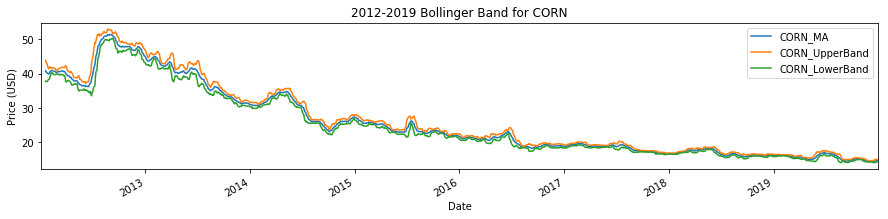

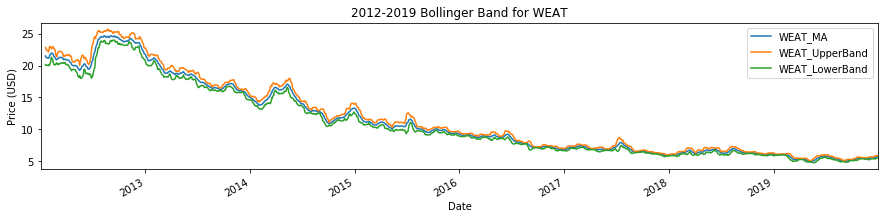

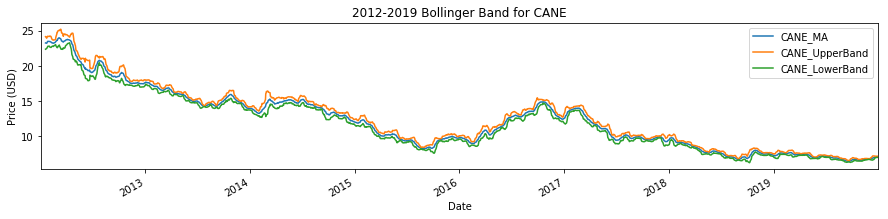

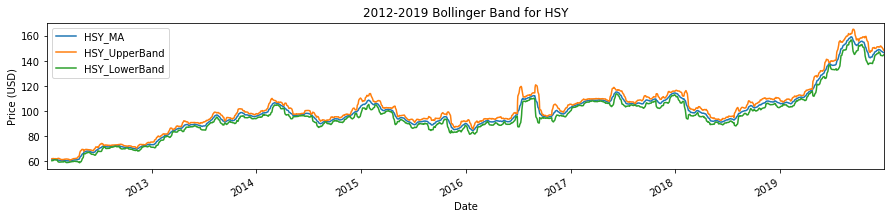

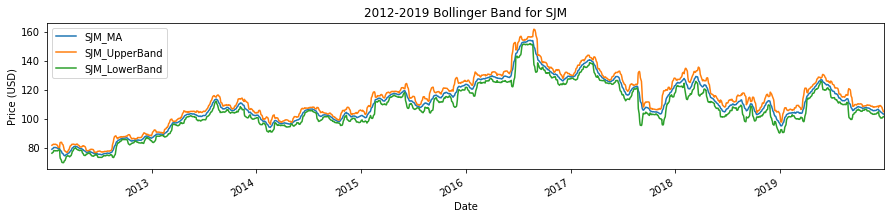

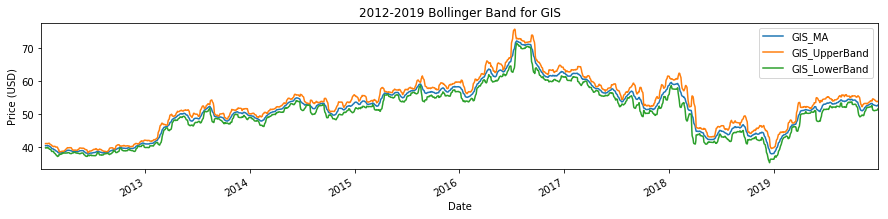

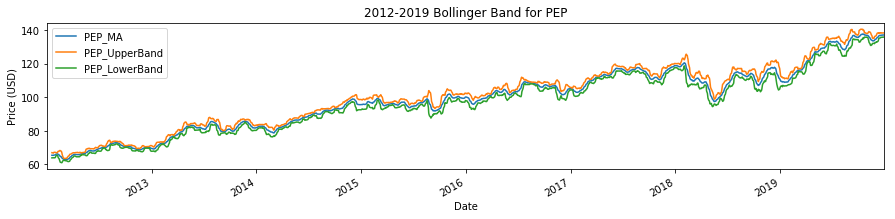

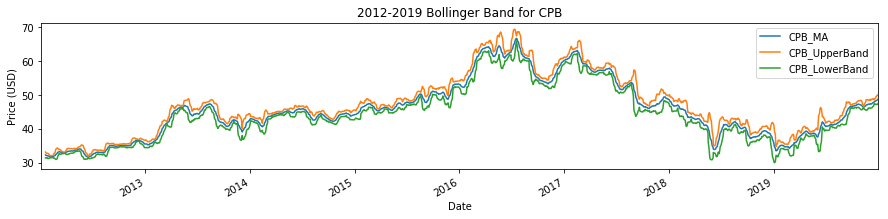

In [38]:
#source: https://medium.com/python-data/setting-up-a-bollinger-band-with-python-28941e2fa300

#Bollinger bands for daily data

#set moving average for CORN_Close--LOW VOLATILITY
data['CORN_MA'] = data['CORN_Close'].rolling(12).mean()
#set standard deviation for sample
data['CORN_STD'] = data['CORN_Close'].rolling(12).std() 
#set upper and lower band
data['CORN_UpperBand'] = data['CORN_MA'] + (data['CORN_STD'] * 2)
data['CORN_LowerBand'] = data['CORN_MA'] - (data['CORN_STD'] * 2)
#Plot Bollinger Band
data[['CORN_MA', 'CORN_UpperBand', 'CORN_LowerBand']].plot(figsize=(15,3))
plt.title('2012-2019 Bollinger Band for CORN')
plt.ylabel('Price (USD)')
plt.show()

#WEAT_Close-- LOW VOLATILITY
data['WEAT_MA'] = data['WEAT_Close'].rolling(12).mean()
data['WEAT_STD'] = data['WEAT_Close'].rolling(12).std() 
data['WEAT_UpperBand'] = data['WEAT_MA'] + (data['WEAT_STD'] * 2)
data['WEAT_LowerBand'] = data['WEAT_MA'] - (data['WEAT_STD'] * 2)
#Plot Bollinger Band
data[['WEAT_MA', 'WEAT_UpperBand', 'WEAT_LowerBand']].plot(figsize=(15,3))
plt.title('2012-2019 Bollinger Band for WEAT')
plt.ylabel('Price (USD)')
plt.show()

#CANE_Close-- LOW VOLATILITY
data['CANE_MA'] = data['CANE_Close'].rolling(12).mean()
data['CANE_STD'] = data['CANE_Close'].rolling(12).std() 
data['CANE_UpperBand'] = data['CANE_MA'] + (data['CANE_STD'] * 2)
data['CANE_LowerBand'] = data['CANE_MA'] - (data['CANE_STD'] * 2)
#Plot Bollinger Band
data[['CANE_MA', 'CANE_UpperBand', 'CANE_LowerBand']].plot(figsize=(15,3))
plt.title('2012-2019 Bollinger Band for CANE')
plt.ylabel('Price (USD)')
plt.show()

#HSY_Close-- LOW VOLATILITY
data['HSY_MA'] = data['HSY_Close'].rolling(12).mean()
data['HSY_STD'] = data['HSY_Close'].rolling(12).std() 
data['HSY_UpperBand'] = data['HSY_MA'] + (data['HSY_STD'] * 2)
data['HSY_LowerBand'] = data['HSY_MA'] - (data['HSY_STD'] * 2)
#Plot Bollinger Band
data[['HSY_MA', 'HSY_UpperBand', 'HSY_LowerBand']].plot(figsize=(15,3))
plt.title('2012-2019 Bollinger Band for HSY')
plt.ylabel('Price (USD)')
plt.show()

#SJM_Close-- LOW VOLATILITY
data['SJM_MA'] = data['SJM_Close'].rolling(12).mean()
data['SJM_STD'] = data['SJM_Close'].rolling(12).std() 
data['SJM_UpperBand'] = data['SJM_MA'] + (data['SJM_STD'] * 2)
data['SJM_LowerBand'] = data['SJM_MA'] - (data['SJM_STD'] * 2)
#Plot Bollinger Band
data[['SJM_MA', 'SJM_UpperBand', 'SJM_LowerBand']].plot(figsize=(15,3))
plt.title('2012-2019 Bollinger Band for SJM')
plt.ylabel('Price (USD)')
plt.show()

#GIS_Close-- LOW VOLATILITY
data['GIS_MA'] = data['GIS_Close'].rolling(12).mean()
data['GIS_STD'] = data['GIS_Close'].rolling(12).std() 
data['GIS_UpperBand'] = data['GIS_MA'] + (data['GIS_STD'] * 2)
data['GIS_LowerBand'] = data['GIS_MA'] - (data['GIS_STD'] * 2)
#Plot Bollinger Band
data[['GIS_MA', 'GIS_UpperBand', 'GIS_LowerBand']].plot(figsize=(15,3))
plt.title('2012-2019 Bollinger Band for GIS')
plt.ylabel('Price (USD)')
plt.show()

#PEP_Close-- LOW VOLATILITY
data['PEP_MA'] = data['PEP_Close'].rolling(12).mean()
data['PEP_STD'] = data['PEP_Close'].rolling(12).std() 
data['PEP_UpperBand'] = data['PEP_MA'] + (data['PEP_STD'] * 2)
data['PEP_LowerBand'] = data['PEP_MA'] - (data['PEP_STD'] * 2)
#Plot Bollinger Band
data[['PEP_MA', 'PEP_UpperBand', 'PEP_LowerBand']].plot(figsize=(15,3))
plt.title('2012-2019 Bollinger Band for PEP')
plt.ylabel('Price (USD)')
plt.show()

#CPB_Close-- LOW VOLATILITY
data['CPB_MA'] = data['CPB_Close'].rolling(12).mean()
data['CPB_STD'] = data['CPB_Close'].rolling(12).std() 
data['CPB_UpperBand'] = data['CPB_MA'] + (data['CPB_STD'] * 2)
data['CPB_LowerBand'] = data['CPB_MA'] - (data['CPB_STD'] * 2)
#Plot Bollinger Band
data[['CPB_MA', 'CPB_UpperBand', 'CPB_LowerBand']].plot(figsize=(15,3))
plt.title('2012-2019 Bollinger Band for CPB')
plt.ylabel('Price (USD)')
plt.show()

In [39]:
#Calculating band width of the Bollinger Bands
#https://school.stockcharts.com/doku.php?id=technical_indicators:bollinger_band_width

diff_CORN = ((data['CORN_UpperBand'] - data['CORN_LowerBand']) / data['CORN_MA'])
diff_WEAT = ((data['WEAT_UpperBand'] - data['WEAT_LowerBand']) / data['WEAT_MA'])
diff_CANE = ((data['CANE_UpperBand'] - data['CANE_LowerBand']) / data['CANE_MA'])
diff_HSY = ((data['HSY_UpperBand'] - data['HSY_LowerBand']) / data['HSY_MA'])
diff_SJM = ((data['SJM_UpperBand'] - data['SJM_LowerBand']) / data['SJM_MA'])
diff_GIS = ((data['GIS_UpperBand'] - data['GIS_LowerBand']) / data['GIS_MA'])
diff_PEP = ((data['PEP_UpperBand'] - data['PEP_LowerBand']) / data['PEP_MA'])
diff_CPB = ((data['CPB_UpperBand'] - data['CPB_LowerBand']) / data['CPB_MA'])

#Looking to find the max width in the Bollinger Band and where that max is in dataset
print('Max Bollinger Band width for CORN', diff_CORN.max())
print (diff_CORN.idxmax())
print('Max Bollinger Band width for WEAT', diff_WEAT.max())
print (diff_WEAT.idxmax())
print('Max Bollinger Band width for CANE', diff_CANE.max())
print (diff_CANE.idxmax())
print('Max Bollinger Band width for HSY', diff_HSY.max())
print (diff_HSY.idxmax())
print('Max Bollinger Band width for SJM', diff_SJM.max())
print (diff_SJM.idxmax())
print('Max Bollinger Band width for GIS', diff_GIS.max())
print (diff_GIS.idxmax())
print('Max Bollinger Band width for PEP', diff_PEP.max())
print (diff_PEP.idxmax())
print('Max Bollinger Band width for CPB', diff_CPB.max())
print (diff_CPB.idxmax())

#average width of the bolinger bands
print('Average Bollinger Band width for CORN', diff_CORN.mean())
print('Average Bollinger Band width for WEAT', diff_WEAT.mean())
print('Average Bollinger Band width for CANE', diff_CANE.mean())
print('Average Bollinger Band width for HSY', diff_HSY.mean())
print('Average Bollinger Band width for SJM', diff_SJM.mean())
print('Average Bollinger Band width for GIS', diff_GIS.mean())
print('Average Bollinger Band width for PEP', diff_PEP.mean())
print('Average Bollinger Band width for CPB', diff_CPB.mean())

Max Bollinger Band width for CORN 0.2892231761225847
2012-07-09 00:00:00
Max Bollinger Band width for WEAT 0.2706921897777359
2015-07-01 00:00:00
Max Bollinger Band width for CANE 0.24392181154312842
2018-10-10 00:00:00
Max Bollinger Band width for HSY 0.28070172246393565
2016-07-08 00:00:00
Max Bollinger Band width for SJM 0.3004934116536535
2017-08-31 00:00:00
Max Bollinger Band width for GIS 0.26974900528150847
2018-03-28 00:00:00
Max Bollinger Band width for PEP 0.15013674074285746
2015-09-01 00:00:00
Max Bollinger Band width for CPB 0.33665804071313904
2018-05-24 00:00:00
Average Bollinger Band width for CORN 0.0615557136308225
Average Bollinger Band width for WEAT 0.07716521576100695
Average Bollinger Band width for CANE 0.0729683893176732
Average Bollinger Band width for HSY 0.05339089058352822
Average Bollinger Band width for SJM 0.06032295561605894
Average Bollinger Band width for GIS 0.05466984032291311
Average Bollinger Band width for PEP 0.04372946552709884
Average Bollinge

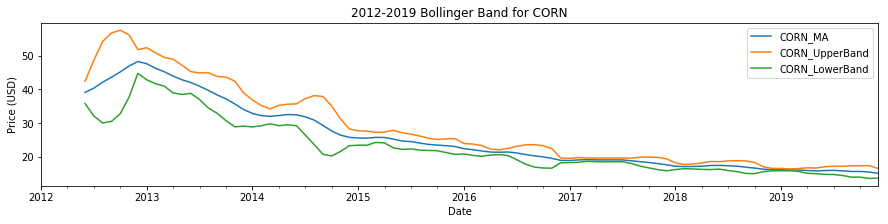

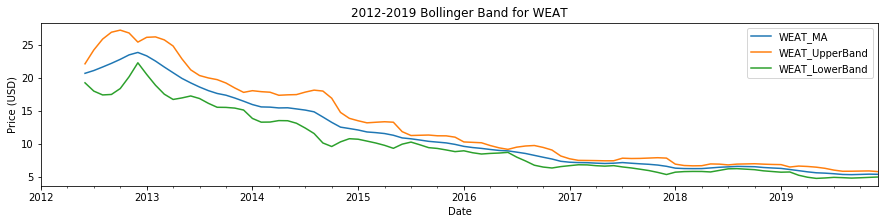

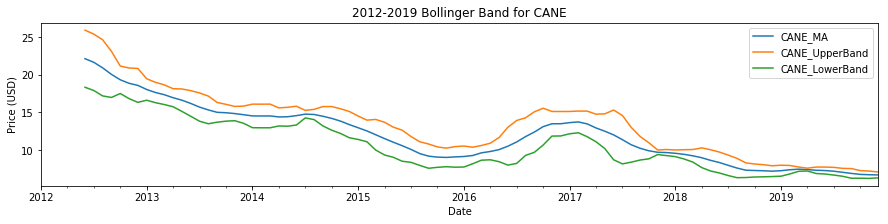

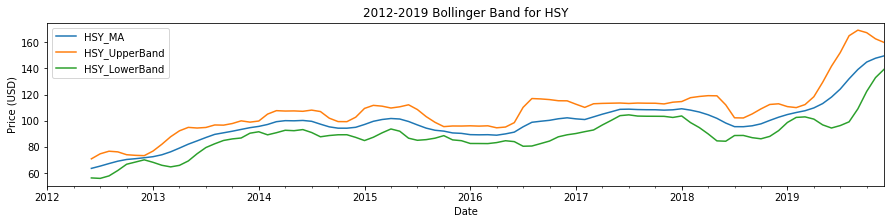

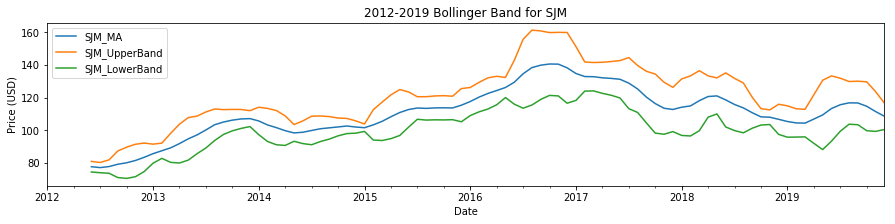

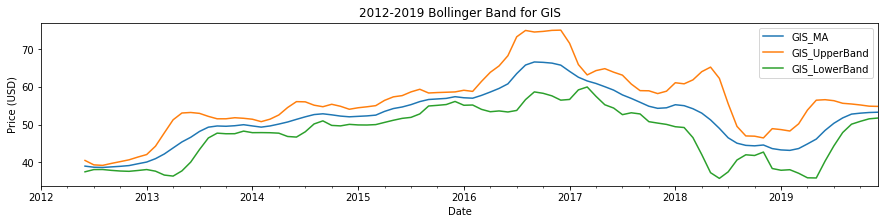

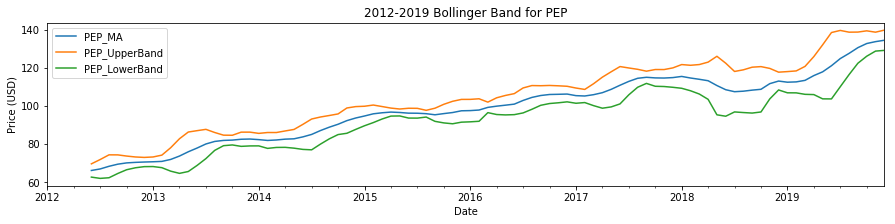

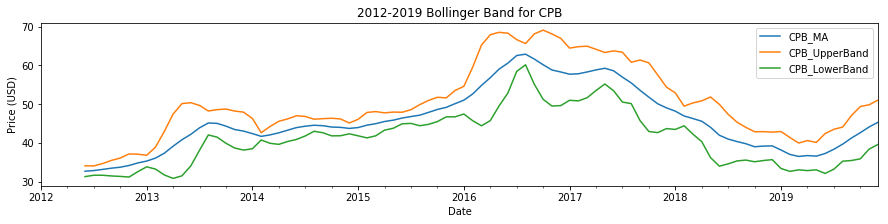

In [40]:
#source: https://medium.com/python-data/setting-up-a-bollinger-band-with-python-28941e2fa300

#Bollinger bands for monthly data

#set moving average for CORN_Close--LOW VOLATILITY
data_month['CORN_MA'] = data_month['CORN_Close'].rolling(6).mean()
#set standard deviation for sample
data_month['CORN_STD'] = data_month['CORN_Close'].rolling(6).std() 
#set upper and lower band
data_month['CORN_UpperBand'] = data_month['CORN_MA'] + (data_month['CORN_STD'] * 2)
data_month['CORN_LowerBand'] = data_month['CORN_MA'] - (data_month['CORN_STD'] * 2)
#Plot Bollinger Band
data_month[['CORN_MA', 'CORN_UpperBand', 'CORN_LowerBand']].plot(figsize=(15,3))
plt.title('2012-2019 Bollinger Band for CORN')
plt.ylabel('Price (USD)')
plt.show()

#WEAT_Close-- LOW VOLATILITY
data_month['WEAT_MA'] = data_month['WEAT_Close'].rolling(6).mean()
data_month['WEAT_STD'] = data_month['WEAT_Close'].rolling(6).std() 
data_month['WEAT_UpperBand'] = data_month['WEAT_MA'] + (data_month['WEAT_STD'] * 2)
data_month['WEAT_LowerBand'] = data_month['WEAT_MA'] - (data_month['WEAT_STD'] * 2)
#Plot Bollinger Band
data_month[['WEAT_MA', 'WEAT_UpperBand', 'WEAT_LowerBand']].plot(figsize=(15,3))
plt.title('2012-2019 Bollinger Band for WEAT')
plt.ylabel('Price (USD)')
plt.show()

#CANE_Close-- LOW VOLATILITY
data_month['CANE_MA'] = data_month['CANE_Close'].rolling(6).mean()
data_month['CANE_STD'] = data_month['CANE_Close'].rolling(6).std() 
data_month['CANE_UpperBand'] = data_month['CANE_MA'] + (data_month['CANE_STD'] * 2)
data_month['CANE_LowerBand'] = data_month['CANE_MA'] - (data_month['CANE_STD'] * 2)
#Plot Bollinger Band
data_month[['CANE_MA', 'CANE_UpperBand', 'CANE_LowerBand']].plot(figsize=(15,3))
plt.title('2012-2019 Bollinger Band for CANE')
plt.ylabel('Price (USD)')
plt.show()

#HSY_Close-- LOW VOLATILITY
data_month['HSY_MA'] = data_month['HSY_Close'].rolling(6).mean()
data_month['HSY_STD'] = data_month['HSY_Close'].rolling(6).std() 
data_month['HSY_UpperBand'] = data_month['HSY_MA'] + (data_month['HSY_STD'] * 2)
data_month['HSY_LowerBand'] = data_month['HSY_MA'] - (data_month['HSY_STD'] * 2)
#Plot Bollinger Band
data_month[['HSY_MA', 'HSY_UpperBand', 'HSY_LowerBand']].plot(figsize=(15,3))
plt.title('2012-2019 Bollinger Band for HSY')
plt.ylabel('Price (USD)')
plt.show()

#SJM_Close-- LOW VOLATILITY
data_month['SJM_MA'] = data_month['SJM_Close'].rolling(6).mean()
data_month['SJM_STD'] = data_month['SJM_Close'].rolling(6).std() 
data_month['SJM_UpperBand'] = data_month['SJM_MA'] + (data_month['SJM_STD'] * 2)
data_month['SJM_LowerBand'] = data_month['SJM_MA'] - (data_month['SJM_STD'] * 2)
#Plot Bollinger Band
data_month[['SJM_MA', 'SJM_UpperBand', 'SJM_LowerBand']].plot(figsize=(15,3))
plt.title('2012-2019 Bollinger Band for SJM')
plt.ylabel('Price (USD)')
plt.show()

#GIS_Close-- LOW VOLATILITY
data_month['GIS_MA'] = data_month['GIS_Close'].rolling(6).mean()
data_month['GIS_STD'] = data_month['GIS_Close'].rolling(6).std() 
data_month['GIS_UpperBand'] = data_month['GIS_MA'] + (data_month['GIS_STD'] * 2)
data_month['GIS_LowerBand'] = data_month['GIS_MA'] - (data_month['GIS_STD'] * 2)
#Plot Bollinger Band
data_month[['GIS_MA', 'GIS_UpperBand', 'GIS_LowerBand']].plot(figsize=(15,3))
plt.title('2012-2019 Bollinger Band for GIS')
plt.ylabel('Price (USD)')
plt.show()

#PEP_Close-- LOW VOLATILITY
data_month['PEP_MA'] = data_month['PEP_Close'].rolling(6).mean()
data_month['PEP_STD'] = data_month['PEP_Close'].rolling(6).std() 
data_month['PEP_UpperBand'] = data_month['PEP_MA'] + (data_month['PEP_STD'] * 2)
data_month['PEP_LowerBand'] = data_month['PEP_MA'] - (data_month['PEP_STD'] * 2)
#Plot Bollinger Band
data_month[['PEP_MA', 'PEP_UpperBand', 'PEP_LowerBand']].plot(figsize=(15,3))
plt.title('2012-2019 Bollinger Band for PEP')
plt.ylabel('Price (USD)')
plt.show()

#CPB_Close-- LOW VOLATILITY
data_month['CPB_MA'] = data_month['CPB_Close'].rolling(6).mean()
data_month['CPB_STD'] = data_month['CPB_Close'].rolling(6).std() 
data_month['CPB_UpperBand'] = data_month['CPB_MA'] + (data_month['CPB_STD'] * 2)
data_month['CPB_LowerBand'] = data_month['CPB_MA'] - (data_month['CPB_STD'] * 2)
#Plot Bollinger Band
data_month[['CPB_MA', 'CPB_UpperBand', 'CPB_LowerBand']].plot(figsize=(15,3))
plt.title('2012-2019 Bollinger Band for CPB')
plt.ylabel('Price (USD)')
plt.show()

In [41]:
#Looking to find the max width in the Bollinger Band and where that max is in dataset

diff_CORN2 = ((data_month['CORN_UpperBand'] - data_month['CORN_LowerBand']) / data_month['CORN_MA'])
diff_WEAT2 = ((data_month['WEAT_UpperBand'] - data_month['WEAT_LowerBand']) / data_month['WEAT_MA'])
diff_CANE2 = ((data_month['CANE_UpperBand'] - data_month['CANE_LowerBand']) / data_month['CANE_MA'])
diff_HSY2 = ((data_month['HSY_UpperBand'] - data_month['HSY_LowerBand']) / data_month['HSY_MA'])
diff_SJM2 = ((data_month['SJM_UpperBand'] - data_month['SJM_LowerBand']) / data_month['SJM_MA'])
diff_GIS2 = ((data_month['GIS_UpperBand'] - data_month['GIS_LowerBand']) / data_month['GIS_MA'])
diff_PEP2 = ((data_month['PEP_UpperBand'] - data_month['PEP_LowerBand']) / data_month['PEP_MA'])
diff_CPB2 = ((data_month['CPB_UpperBand'] - data_month['CPB_LowerBand']) / data_month['CPB_MA'])


print('Max Bollinger Band width for CORN', diff_CORN2.max())
print (diff_CORN2.idxmax())
print('Max Bollinger Band width for WEAT', diff_WEAT2.max())
print (diff_WEAT2.idxmax())
print('Max Bollinger Band width for CANE', diff_CANE2.max())
print (diff_CANE2.idxmax())
print('Max Bollinger Band width for HSY', diff_HSY2.max())
print (diff_HSY2.idxmax())
print('Max Bollinger Band width for SJM', diff_SJM2.max())
print (diff_SJM2.idxmax())
print('Max Bollinger Band width for GIS', diff_GIS2.max())
print (diff_GIS2.idxmax())
print('Max Bollinger Band width for PEP', diff_PEP2.max())
print (diff_PEP2.idxmax())
print('Max Bollinger Band width for CPB', diff_CPB2.max())
print (diff_CPB2.idxmax())

#average width of the bolinger bands
print('Average Bollinger Band width for CORN', diff_CORN2.mean())
print('Average Bollinger Band width for WEAT', diff_WEAT2.mean())
print('Average Bollinger Band width for CANE', diff_CANE2.mean())
print('Average Bollinger Band width for HSY', diff_HSY2.mean())
print('Average Bollinger Band width for SJM', diff_SJM2.mean())
print('Average Bollinger Band width for GIS', diff_GIS2.mean())
print('Average Bollinger Band width for PEP', diff_PEP2.mean())
print('Average Bollinger Band width for CPB', diff_CPB2.mean())

Max Bollinger Band width for CORN 0.600967406340892
2012-09-30 00:00:00
Max Bollinger Band width for WEAT 0.5585052789002825
2014-09-30 00:00:00
Max Bollinger Band width for CANE 0.5638711928636102
2017-07-31 00:00:00
Max Bollinger Band width for HSY 0.4981006125477835
2019-08-31 00:00:00
Max Bollinger Band width for SJM 0.38798391499965124
2019-05-31 00:00:00
Max Bollinger Band width for GIS 0.5449855345780921
2018-05-31 00:00:00
Max Bollinger Band width for PEP 0.2877927734691026
2019-06-30 00:00:00
Max Bollinger Band width for CPB 0.45638950520711175
2013-05-31 00:00:00
Average Bollinger Band width for CORN 0.19776032844310043
Average Bollinger Band width for WEAT 0.22840195624310347
Average Bollinger Band width for CANE 0.24381811871918732
Average Bollinger Band width for HSY 0.19119366625401854
Average Bollinger Band width for SJM 0.19497032996334968
Average Bollinger Band width for GIS 0.16498150034473735
Average Bollinger Band width for PEP 0.12518635857945887
Average Bollinger 

[**Maximum Drawdown (MDD)**](https://www.investopedia.com/terms/m/maximum-drawdown-mdd.asp)
- Another way of dealing with volatility is to find the maximum drawdown
- the maximum observed loss from a peak to a trough of a portfolio, before a new peak is attained
- Maximum drawdown is an indicator of downside risk over a specified time period
- expressed in percentage terms
- A low maximum drawdown is preferred
    - If an investment never lost a penny, the maximum drawdown would be zero

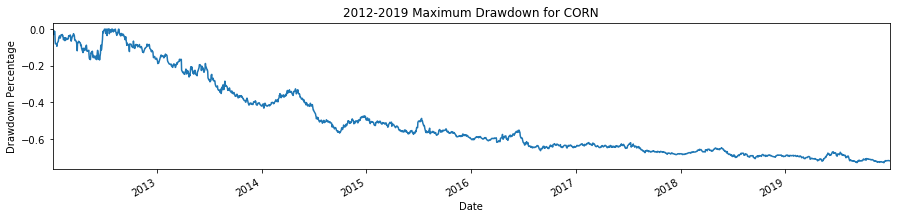

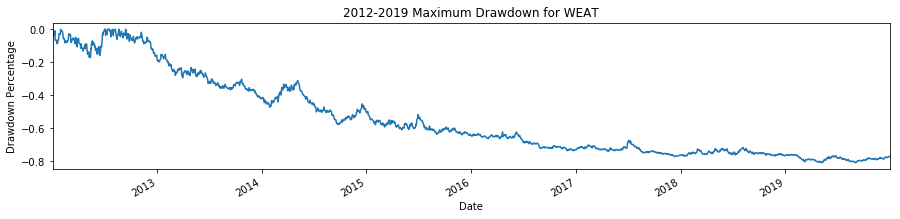

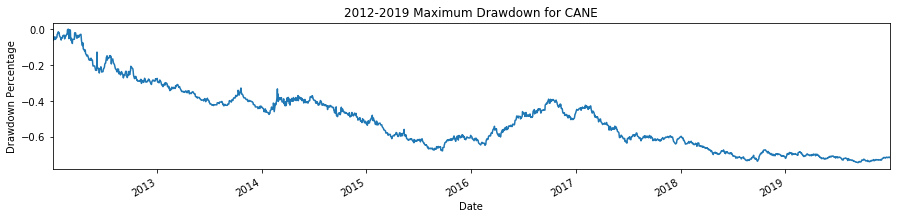

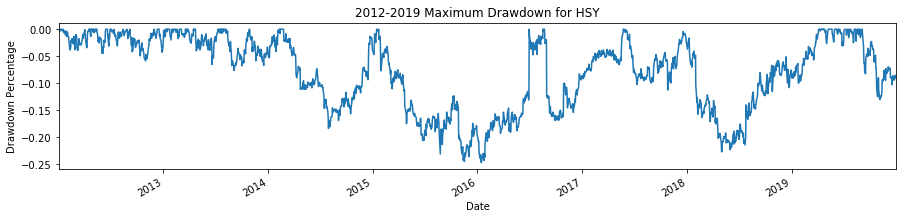

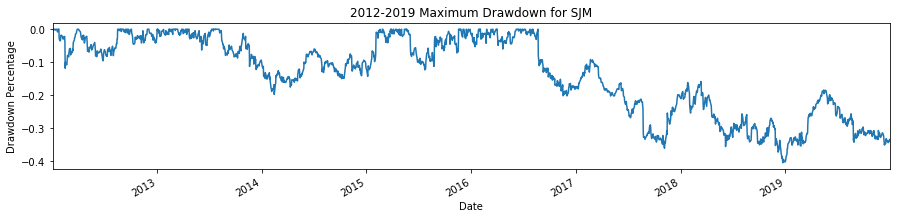

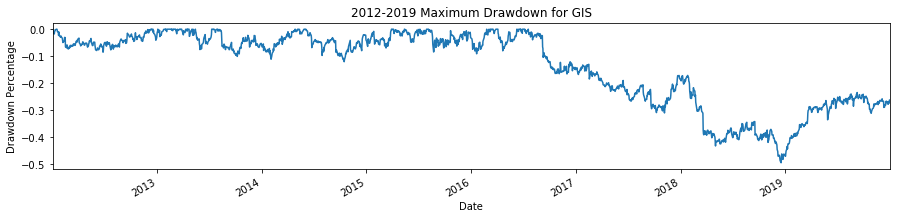

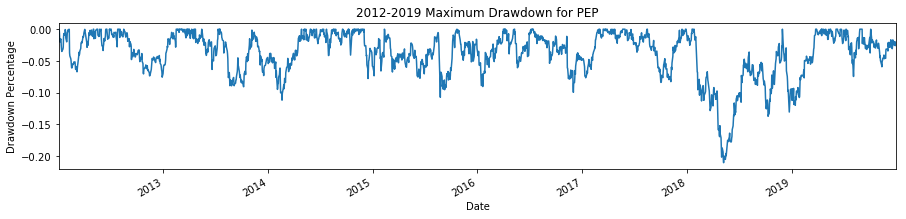

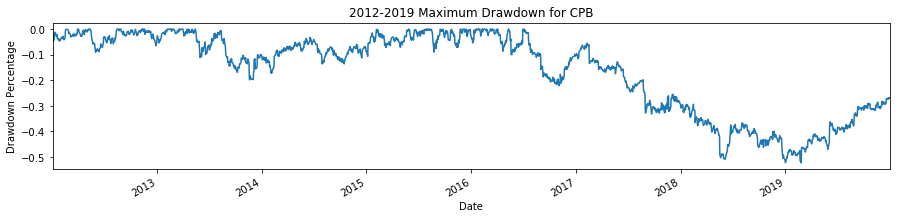

In [23]:
#take the stock cumulative return and put into formula with maximum cumulative return
#https://seekingalpha.com/instablog/42079636-kayode-omotosho/5377452-computing-maximum-drawdown-of-stocks-in-python

#maximum drawdown for daily data
#CORN_Close Max Drawdown
CORN_CumMax = data['CORN_cum_return'].cummax()
data['CORN_MaxDrawdown'] = ((data['CORN_cum_return']) - CORN_CumMax)/CORN_CumMax
data['CORN_MaxDrawdown'].plot(figsize=(15,3))
plt.title('2012-2019 Maximum Drawdown for CORN')
plt.ylabel('Drawdown Percentage')
plt.show()

#WEAT_Close Max Drawdown--GREATEST DRAWDOWN
WEAT_CumMax = data['WEAT_cum_return'].cummax()
data['WEAT_MaxDrawdown'] = ((data['WEAT_cum_return']) - WEAT_CumMax)/WEAT_CumMax
data['WEAT_MaxDrawdown'].plot(figsize=(15,3))
plt.title('2012-2019 Maximum Drawdown for WEAT')
plt.ylabel('Drawdown Percentage')
plt.show()

#CANE_Close Max Drawdown
CANE_CumMax = data['CANE_cum_return'].cummax()
data['CANE_MaxDrawdown'] = ((data['CANE_cum_return']) - CANE_CumMax)/CANE_CumMax
data['CANE_MaxDrawdown'].plot(figsize=(15,3))
plt.title('2012-2019 Maximum Drawdown for CANE')
plt.ylabel('Drawdown Percentage')
plt.show()

#HSY_Close Max Drawdown
HSY_CumMax = data['HSY_cum_return'].cummax()
data['HSY_MaxDrawdown'] = ((data['HSY_cum_return']) - HSY_CumMax)/HSY_CumMax
data['HSY_MaxDrawdown'].plot(figsize=(15,3))
plt.title('2012-2019 Maximum Drawdown for HSY')
plt.ylabel('Drawdown Percentage')
plt.show()

#SJM_Close Max Drawdown
SJM_CumMax = data['SJM_cum_return'].cummax()
data['SJM_MaxDrawdown'] = ((data['SJM_cum_return']) - SJM_CumMax)/SJM_CumMax
data['SJM_MaxDrawdown'].plot(figsize=(15,3))
plt.title('2012-2019 Maximum Drawdown for SJM')
plt.ylabel('Drawdown Percentage')
plt.show()

#GIS_Close Max Drawdown--BIG DRAWDOWN
GIS_CumMax = data['GIS_cum_return'].cummax()
data['GIS_MaxDrawdown'] = ((data['GIS_cum_return']) - GIS_CumMax)/GIS_CumMax
data['GIS_MaxDrawdown'].plot(figsize=(15,3))
plt.title('2012-2019 Maximum Drawdown for GIS')
plt.ylabel('Drawdown Percentage')
plt.show()

#PEP_Close Max Drawdown
PEP_CumMax = data['PEP_cum_return'].cummax()
data['PEP_MaxDrawdown'] = ((data['PEP_cum_return']) - PEP_CumMax)/PEP_CumMax
data['PEP_MaxDrawdown'].plot(figsize=(15,3))
plt.title('2012-2019 Maximum Drawdown for PEP')
plt.ylabel('Drawdown Percentage')
plt.show()

#CPB_Close Max Drawdown--BIG DRAWDOWN
CPB_CumMax = data['CPB_cum_return'].cummax()
data['CPB_MaxDrawdown'] = ((data['CPB_cum_return']) - CPB_CumMax)/CPB_CumMax
data['CPB_MaxDrawdown'].plot(figsize=(15,3))
plt.title('2012-2019 Maximum Drawdown for CPB')
plt.ylabel('Drawdown Percentage')
plt.show()

In [24]:
#Average max drawdown for daily data
print('Avg CORN_MaxDrawdown for CORN', data['CORN_MaxDrawdown'].mean())
print('Avg WEAT_MaxDrawdown for CORN', data['WEAT_MaxDrawdown'].mean())
print('Avg CANE_MaxDrawdown for CORN', data['CANE_MaxDrawdown'].mean())
print('Avg HSY_MaxDrawdown for CORN', data['HSY_MaxDrawdown'].mean())
print('Avg SJM_MaxDrawdown for CORN', data['SJM_MaxDrawdown'].mean())
print('Avg GIS_MaxDrawdown for CORN', data['GIS_MaxDrawdown'].mean())
print('Avg PEP_MaxDrawdown for CORN', data['PEP_MaxDrawdown'].mean())
print('Avg CPB_MaxDrawdown for CORN', data['CPB_MaxDrawdown'].mean())

Avg CORN_MaxDrawdown for CORN -0.5000399205864924
Avg WEAT_MaxDrawdown for CORN -0.5439004089156839
Avg CANE_MaxDrawdown for CORN -0.5071963706394718
Avg HSY_MaxDrawdown for CORN -0.08064209184334784
Avg SJM_MaxDrawdown for CORN -0.13609305853569706
Avg GIS_MaxDrawdown for CORN -0.13714684061424795
Avg PEP_MaxDrawdown for CORN -0.03813361212043794
Avg CPB_MaxDrawdown for CORN -0.16036030114922764


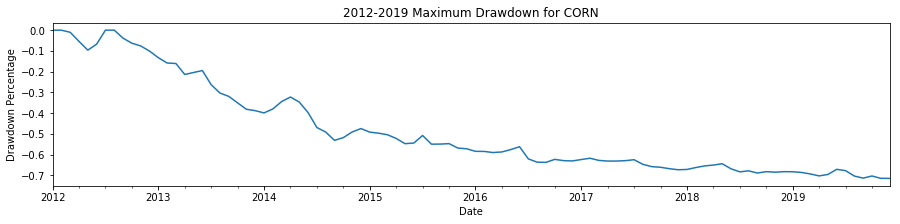

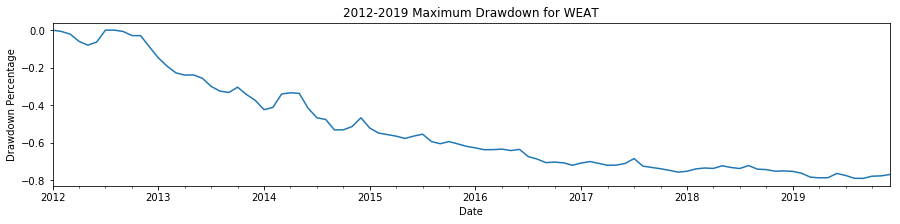

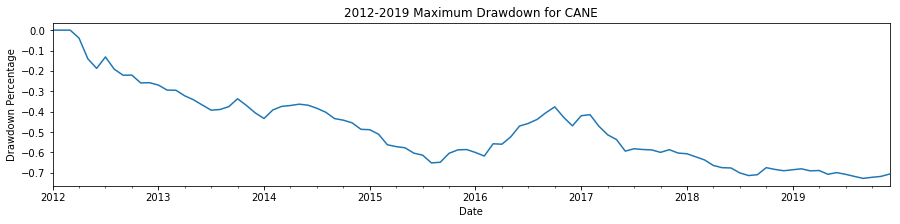

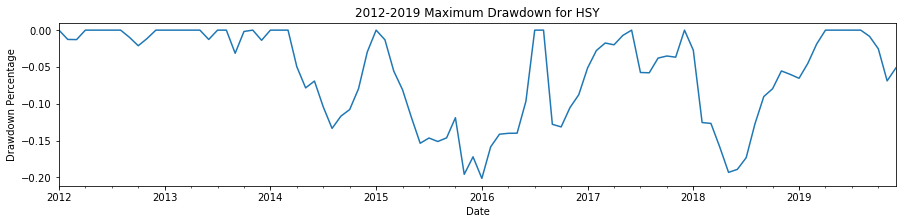

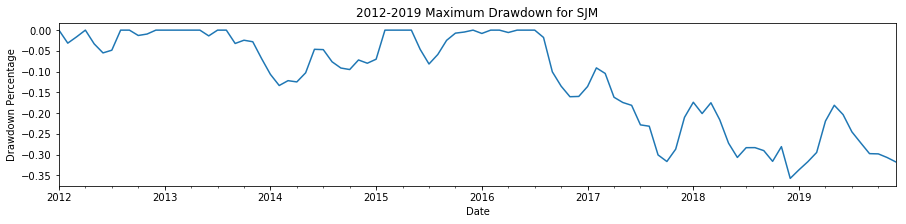

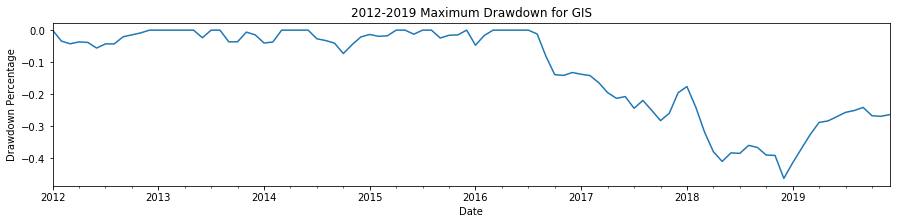

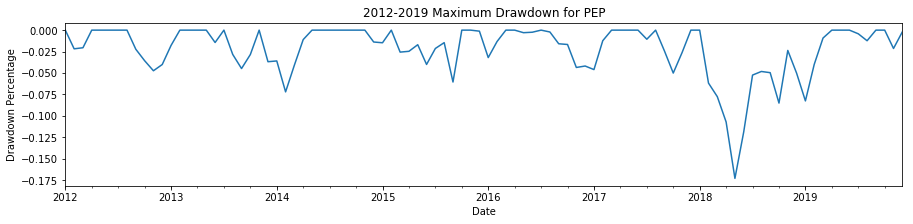

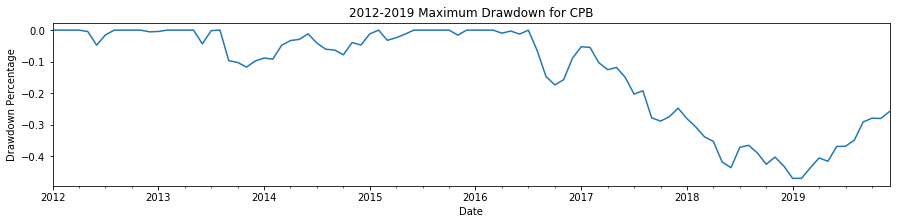

In [25]:
#take the stock cumulative return and put into formula with maximum cumulative return
#https://seekingalpha.com/instablog/42079636-kayode-omotosho/5377452-computing-maximum-drawdown-of-stocks-in-python

#maximum drawdown for monthly data
#CORN_Close Max Drawdown
CORN_CumMax = data_month['CORN_cum_return'].cummax()
data_month['CORN_MaxDrawdown'] = ((data_month['CORN_cum_return']) - CORN_CumMax)/CORN_CumMax
data_month['CORN_MaxDrawdown'].plot(figsize=(15,3))
plt.title('2012-2019 Maximum Drawdown for CORN')
plt.ylabel('Drawdown Percentage')
plt.show()

#WEAT_Close Max Drawdown--GREATEST DRAWDOWN
WEAT_CumMax = data_month['WEAT_cum_return'].cummax()
data_month['WEAT_MaxDrawdown'] = ((data_month['WEAT_cum_return']) - WEAT_CumMax)/WEAT_CumMax
data_month['WEAT_MaxDrawdown'].plot(figsize=(15,3))
plt.title('2012-2019 Maximum Drawdown for WEAT')
plt.ylabel('Drawdown Percentage')
plt.show()

#CANE_Close Max Drawdown
CANE_CumMax = data_month['CANE_cum_return'].cummax()
data_month['CANE_MaxDrawdown'] = ((data_month['CANE_cum_return']) - CANE_CumMax)/CANE_CumMax
data_month['CANE_MaxDrawdown'].plot(figsize=(15,3))
plt.title('2012-2019 Maximum Drawdown for CANE')
plt.ylabel('Drawdown Percentage')
plt.show()

#HSY_Close Max Drawdown
HSY_CumMax = data_month['HSY_cum_return'].cummax()
data_month['HSY_MaxDrawdown'] = ((data_month['HSY_cum_return']) - HSY_CumMax)/HSY_CumMax
data_month['HSY_MaxDrawdown'].plot(figsize=(15,3))
plt.title('2012-2019 Maximum Drawdown for HSY')
plt.ylabel('Drawdown Percentage')
plt.show()

#SJM_Close Max Drawdown
SJM_CumMax = data_month['SJM_cum_return'].cummax()
data_month['SJM_MaxDrawdown'] = ((data_month['SJM_cum_return']) - SJM_CumMax)/SJM_CumMax
data_month['SJM_MaxDrawdown'].plot(figsize=(15,3))
plt.title('2012-2019 Maximum Drawdown for SJM')
plt.ylabel('Drawdown Percentage')
plt.show()

#GIS_Close Max Drawdown--BIG DRAWDOWN
GIS_CumMax = data_month['GIS_cum_return'].cummax()
data_month['GIS_MaxDrawdown'] = ((data_month['GIS_cum_return']) - GIS_CumMax)/GIS_CumMax
data_month['GIS_MaxDrawdown'].plot(figsize=(15,3))
plt.title('2012-2019 Maximum Drawdown for GIS')
plt.ylabel('Drawdown Percentage')
plt.show()

#PEP_Close Max Drawdown
PEP_CumMax = data_month['PEP_cum_return'].cummax()
data_month['PEP_MaxDrawdown'] = ((data_month['PEP_cum_return']) - PEP_CumMax)/PEP_CumMax
data_month['PEP_MaxDrawdown'].plot(figsize=(15,3))
plt.title('2012-2019 Maximum Drawdown for PEP')
plt.ylabel('Drawdown Percentage')
plt.show()

#CPB_Close Max Drawdown--BIG DRAWDOWN
CPB_CumMax = data_month['CPB_cum_return'].cummax()
data_month['CPB_MaxDrawdown'] = ((data_month['CPB_cum_return']) - CPB_CumMax)/CPB_CumMax
data_month['CPB_MaxDrawdown'].plot(figsize=(15,3))
plt.title('2012-2019 Maximum Drawdown for CPB')
plt.ylabel('Drawdown Percentage')
plt.show()

In [26]:
#Average max drawdown for monthly data
print('Avg CORN_MaxDrawdown for CORN', data_month['CORN_MaxDrawdown'].mean())
print('Avg WEAT_MaxDrawdown for CORN', data_month['WEAT_MaxDrawdown'].mean())
print('Avg CANE_MaxDrawdown for CORN', data_month['CANE_MaxDrawdown'].mean())
print('Avg HSY_MaxDrawdown for CORN', data_month['HSY_MaxDrawdown'].mean())
print('Avg SJM_MaxDrawdown for CORN', data_month['SJM_MaxDrawdown'].mean())
print('Avg GIS_MaxDrawdown for CORN', data_month['GIS_MaxDrawdown'].mean())
print('Avg PEP_MaxDrawdown for CORN', data_month['PEP_MaxDrawdown'].mean())
print('Avg CPB_MaxDrawdown for CORN', data_month['CPB_MaxDrawdown'].mean())

Avg CORN_MaxDrawdown for CORN -0.484000236377343
Avg WEAT_MaxDrawdown for CORN -0.528092604678688
Avg CANE_MaxDrawdown for CORN -0.48543344275240985
Avg HSY_MaxDrawdown for CORN -0.058514430805259844
Avg SJM_MaxDrawdown for CORN -0.11678348633157465
Avg GIS_MaxDrawdown for CORN -0.12204014056178762
Avg PEP_MaxDrawdown for CORN -0.02199833076150802
Avg CPB_MaxDrawdown for CORN -0.13469489600670811


In [27]:
#Save new dataset to csv
data.to_csv('CapstoneCalculatedData.csv')

In [29]:
data['CORN_MA'].head(20)

Date
2012-01-03          NaN
2012-01-04          NaN
2012-01-05          NaN
2012-01-06          NaN
2012-01-09          NaN
2012-01-10          NaN
2012-01-11          NaN
2012-01-12          NaN
2012-01-13          NaN
2012-01-17          NaN
2012-01-18          NaN
2012-01-19    40.865000
2012-01-20    40.600833
2012-01-23    40.376667
2012-01-24    40.280833
2012-01-25    40.224167
2012-01-26    40.096667
2012-01-27    40.015000
2012-01-30    39.889167
2012-01-31    39.983333
Name: CORN_MA, dtype: float64

In [30]:
data_month['CORN_MA'].head(20)

Date
2012-01-31          NaN
2012-02-29          NaN
2012-03-31          NaN
2012-04-30          NaN
2012-05-31          NaN
2012-06-30    39.141610
2012-07-31    40.408816
2012-08-31    42.154331
2012-09-30    43.639008
2012-10-31    45.213163
2012-11-30    46.962138
2012-12-31    48.303718
2013-01-31    47.649987
2013-02-28    46.299762
2013-03-31    45.259297
2013-04-30    43.976181
2013-05-31    42.884099
2013-06-30    42.083682
2013-07-31    40.974494
2013-08-31    39.741659
Freq: M, Name: CORN_MA, dtype: float64

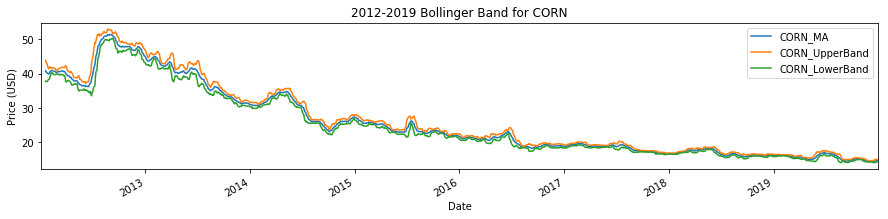

In [32]:
#set moving average for CORN_Close--LOW VOLATILITY
data['CORN_MA'] = data['CORN_Close'].rolling(12).mean()
#set standard deviation for sample
data['CORN_STD'] = data['CORN_Close'].rolling(12).std() 
#set upper and lower band
data['CORN_UpperBand'] = data['CORN_MA'] + (data['CORN_STD'] * 2)
data['CORN_LowerBand'] = data['CORN_MA'] - (data['CORN_STD'] * 2)
diff_CORN = ((data['CORN_UpperBand'] - data['CORN_LowerBand']) / data['CORN_MA'])
#Plot Bollinger Band
data[['CORN_MA', 'CORN_UpperBand', 'CORN_LowerBand']].plot(figsize=(15,3))
plt.title('2012-2019 Bollinger Band for CORN')
plt.ylabel('Price (USD)')
plt.show()

In [33]:
print('Average Bollinger Band width for CORN', diff_CORN.mean())

Average Bollinger Band width for CORN 0.0615557136308225


In [34]:
diff_CORN2 = ((data_month['CORN_UpperBand'] - data_month['CORN_LowerBand']) / data_month['CORN_MA'])
print('Average Bollinger Band width for CORN', diff_CORN2.mean())

Average Bollinger Band width for CORN 0.19776032844310043
